# Setting enviroment


In [1]:
%reload_ext kedro.ipython

[01/07/25 09:55:40] INFO     Using                                                                  ]8;id=294664;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=672125;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/home/bruno/Documents/Programming/Programming_projects/olist_project/                
                             .venv/lib/python3.11/site-packages/kedro/framework/project/rich_loggin                
                             g.yml' as logging configuration.                                                      

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=102537;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=173569;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#61\61]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=964337;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=417813;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Resolved project path as:                                              ]8;id=834966;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=321490;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#178\178]8;;\
                             /home/bruno/Documents/Programming/Programming_projects/olist_project.                 
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/07/25 09:55:46] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=431108;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=241385;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[01/07/25 09:55:47] INFO     Kedro project olist_project                                            ]8;id=36271;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=4337;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#144\144]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=619612;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=346875;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#145\145]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=835896;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=669248;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#151\151]8;;\

In [2]:
import pandas as pd
import numpy as np
# import shap

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from feature_engine.imputation import CategoricalImputer,ArbitraryNumberImputer,MeanMedianImputer
from feature_engine.encoding import RareLabelEncoder, CountFrequencyEncoder
from feature_engine.creation import MathFeatures, RelativeFeatures
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.selection import (
    DropDuplicateFeatures, 
    DropConstantFeatures,
    DropHighPSIFeatures,
    SelectByInformationValue,
    SmartCorrelatedSelection,
    RecursiveFeatureElimination,
    RecursiveFeatureAddition,
    SelectByShuffling
)

from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from scipy.stats import ks_2samp

import matplotlib.pyplot as plt
import seaborn as sns

import mlflow

import warnings
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier,
    HistGradientBoostingClassifier, GradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from olist_project.utils.model import mlflow_experiment_run_cv
from category_encoders.cat_boost import CatBoostEncoder
from catboost import Pool, EShapCalcType, EFeaturesSelectionAlgorithm

from olist_project.utils.model import get_model, ModelType

import copy

In [3]:
pd.set_option('display.max_columns', 110)
pd.set_option('display.max_rows', 110)

In [4]:
experiment_name = 'feature_selection'
mlflow_tracking_uri = context.project_path.as_uri()+'/mlflow'
mlflow.set_tracking_uri(mlflow_tracking_uri)
mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='file:///home/bruno/Documents/Programming/Programming_projects/olist_project/mlflow/661832313454193859', creation_time=1735658302073, experiment_id='661832313454193859', last_update_time=1735658302073, lifecycle_stage='active', name='feature_selection', tags={}>

# Load data


In [5]:
random_state = catalog.load('params:random_state')
id_col = catalog.load('params:audience_building.id_col')
cohort_col = catalog.load('params:audience_building.cohort_col')
target_name = catalog.load('params:modeling.target')
X_dev = catalog.load("X_train")
y_dev = catalog.load("y_train")
y_dev = y_dev[target_name]
id_model_dev = catalog.load("id_model_train")
cohort_dev = pd.to_datetime(id_model_dev[cohort_col], format='%Y%m')

X_oot = catalog.load("X_test_oot")
y_oot = catalog.load("y_test_oot")
y_oot = y_oot[target_name]
id_model_oot = catalog.load("id_model_test_oot")
cohort_oot = pd.to_datetime(id_model_oot[cohort_col], format='%Y%m')

[01/07/25 09:55:48] INFO     Loading data from params:random_state (MemoryDataset)...           ]8;id=797557;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=579771;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#389\389]8;;\

                    INFO     Loading data from params:audience_building.id_col                  ]8;id=555830;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=222843;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (MemoryDataset)...                                                                    

                    INFO     Loading data from params:audience_building.cohort_col              ]8;id=91879;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=417939;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (MemoryDataset)...                                                                    

                    INFO     Loading data from params:modeling.target (MemoryDataset)...        ]8;id=418729;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=55244;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#389\389]8;;\

                    INFO     Loading data from X_train (ParquetDataset)...                      ]8;id=791280;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=540057;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#389\389]8;;\

                    INFO     Loading data from y_train (ParquetDataset)...                      ]8;id=397215;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=593386;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#389\389]8;;\

                    INFO     Loading data from id_model_train (ParquetDataset)...               ]8;id=348071;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=557949;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#389\389]8;;\

                    INFO     Loading data from X_test_oot (ParquetDataset)...                   ]8;id=567278;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=817476;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#389\389]8;;\

                    INFO     Loading data from y_test_oot (ParquetDataset)...                   ]8;id=944778;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=110931;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#389\389]8;;\

                    INFO     Loading data from id_model_test_oot (ParquetDataset)...            ]8;id=839200;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=865750;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#389\389]8;;\

# Define model


In [6]:
cat_vars = [col for col in X_dev.select_dtypes('category').columns]
num_vars = [col for col in X_dev.columns if col not in cat_vars]
model = get_model(X_dev,cat_vars,num_vars,
                  model_type=ModelType.LGBM)
skf = StratifiedKFold(5)
model

Pipeline(steps=[('cat_imputer',
                 CategoricalImputer(variables=['sel_seller_state'])),
                ('rare_encoder',
                 RareLabelEncoder(variables=['sel_seller_state'])),
                ('estimator', LGBMClassifier(random_state=42, verbosity=-1))])

# Filter methods


## Drop duplicates


In [64]:
pipe_steps = copy.deepcopy(model.steps)
pipe_steps.insert(-1,('drop_duplicated', DropDuplicateFeatures()))
pipe_steps
feature_pipe = Pipeline(pipe_steps)
feature_pipe[:-1].fit(X_dev)

Pipeline(steps=[('cat_imputer',
                 CategoricalImputer(variables=['sel_seller_state'])),
                ('rare_encoder',
                 RareLabelEncoder(variables=['sel_seller_state'])),
                ('drop_duplicated', DropDuplicateFeatures())])

In [18]:
print('there is no duplicated features sets!')
feature_pipe[2].duplicated_feature_sets_

there is no duplicated features sets!


[]

## Drop quasi constant


In [45]:
pipe_steps = copy.deepcopy(model.steps)
pipe_steps.insert(-1,('num_imputer', ArbitraryNumberImputer(-99999999)))
pipe_steps.insert(-1,('drop_constant', DropConstantFeatures(tol=.95)))
pipe_steps


[
    ('cat_imputer', CategoricalImputer(variables=['sel_seller_state'])),
    ('rare_encoder', RareLabelEncoder(variables=['sel_seller_state'])),
    ('num_imputer', ArbitraryNumberImputer(arbitrary_number=-99999999)),
    ('drop_constant', DropConstantFeatures(tol=0.95)),
    ('estimator', LGBMClassifier(random_state=42, verbosity=-1))
]

In [46]:
feature_pipe = Pipeline(pipe_steps)
feature_pipe[:-1].fit(X_dev,y_dev)

Pipeline(steps=[('cat_imputer',
                 CategoricalImputer(variables=['sel_seller_state'])),
                ('rare_encoder',
                 RareLabelEncoder(variables=['sel_seller_state'])),
                ('num_imputer',
                 ArbitraryNumberImputer(arbitrary_number=-99999999)),
                ('drop_constant', DropConstantFeatures(tol=0.95))])

In [51]:
len(feature_pipe[-2].feature_names_in_),len(feature_pipe[-2].features_to_drop_),len(feature_pipe[-2].variables_)

(370, 3, 370)

In [ ]:
selected_features = feature_pipe[-2].get_feature_names_out()
len(selected_features),selected_features


(
    367,
    [
        'ord_total_orders_m3',
        'ord_nunique_cohorts_m3',
        'ord_mean_estimated_days_to_order_delivery_m3',
        'ord_std_estimated_days_to_order_delivery_m3',
        'ord_max_estimated_days_to_order_delivery_m3',
        'ord_min_estimated_days_to_order_delivery_m3',
        'ord_mean_days_to_order_approval_m3',
        'ord_std_days_to_order_approval_m3',
        'ord_max_days_to_order_approval_m3',
        'ord_min_days_to_order_approval_m3',
        'ord_mean_days_to_order_posting_m3',
        'ord_std_days_to_order_posting_m3',
        'ord_max_days_to_order_posting_m3',
        'ord_min_days_to_order_posting_m3',
        'ord_mean_days_to_order_delivery_m3',
        'ord_std_days_to_order_delivery_m3',
        'ord_max_days_to_order_delivery_m3',
        'ord_min_days_to_order_delivery_m3',
        'ord_mean_diff_days_actual_estimated_delivery_m3',
        'ord_std_diff_days_actual_estimated_delivery_m3',
        'ord_max_diff_days_actual_estima

## Drop PSI


In [72]:
pipe_steps = copy.deepcopy(model.steps)
pipe_steps.insert(-1,('num_imputer', ArbitraryNumberImputer(-99999999)))
pipe_steps.insert(-1,('drop_constant', DropConstantFeatures(tol=.95)))
pipe_steps.insert(-1,('drop_psi', DropHighPSIFeatures(threshold=0.1)))
pipe_steps


[
    ('cat_imputer', CategoricalImputer(variables=['sel_seller_state'])),
    ('rare_encoder', RareLabelEncoder(variables=['sel_seller_state'])),
    ('num_imputer', ArbitraryNumberImputer(arbitrary_number=-99999999)),
    ('drop_constant', DropConstantFeatures(tol=0.95)),
    ('drop_psi', DropHighPSIFeatures(threshold=0.1)),
    ('estimator', LGBMClassifier(random_state=42, verbosity=-1))
]

In [73]:
feature_pipe = Pipeline(pipe_steps)
feature_pipe[:-1].fit(X_dev,y_dev)

Pipeline(steps=[('cat_imputer',
                 CategoricalImputer(variables=['sel_seller_state'])),
                ('rare_encoder',
                 RareLabelEncoder(variables=['sel_seller_state'])),
                ('num_imputer',
                 ArbitraryNumberImputer(arbitrary_number=-99999999)),
                ('drop_constant', DropConstantFeatures(tol=0.95)),
                ('drop_psi', DropHighPSIFeatures(threshold=0.1))])

In [74]:
selected_features = feature_pipe[-2].get_feature_names_out()
len(selected_features),selected_features


(
    365,
    [
        'ord_total_orders_m3',
        'ord_nunique_cohorts_m3',
        'ord_std_estimated_days_to_order_delivery_m3',
        'ord_max_estimated_days_to_order_delivery_m3',
        'ord_min_estimated_days_to_order_delivery_m3',
        'ord_mean_days_to_order_approval_m3',
        'ord_std_days_to_order_approval_m3',
        'ord_max_days_to_order_approval_m3',
        'ord_min_days_to_order_approval_m3',
        'ord_mean_days_to_order_posting_m3',
        'ord_std_days_to_order_posting_m3',
        'ord_max_days_to_order_posting_m3',
        'ord_min_days_to_order_posting_m3',
        'ord_std_days_to_order_delivery_m3',
        'ord_max_days_to_order_delivery_m3',
        'ord_min_days_to_order_delivery_m3',
        'ord_mean_diff_days_actual_estimated_delivery_m3',
        'ord_std_diff_days_actual_estimated_delivery_m3',
        'ord_max_diff_days_actual_estimated_delivery_m3',
        'ord_min_diff_days_actual_estimated_delivery_m3',
        'ord_recency_m3',


## Drop IV


In [105]:
selected_features_psi = [
        'ord_total_orders_m3',
        'ord_nunique_cohorts_m3',
        'ord_std_estimated_days_to_order_delivery_m3',
        'ord_max_estimated_days_to_order_delivery_m3',
        'ord_min_estimated_days_to_order_delivery_m3',
        'ord_mean_days_to_order_approval_m3',
        'ord_std_days_to_order_approval_m3',
        'ord_max_days_to_order_approval_m3',
        'ord_min_days_to_order_approval_m3',
        'ord_mean_days_to_order_posting_m3',
        'ord_std_days_to_order_posting_m3',
        'ord_max_days_to_order_posting_m3',
        'ord_min_days_to_order_posting_m3',
        'ord_std_days_to_order_delivery_m3',
        'ord_max_days_to_order_delivery_m3',
        'ord_min_days_to_order_delivery_m3',
        'ord_mean_diff_days_actual_estimated_delivery_m3',
        'ord_std_diff_days_actual_estimated_delivery_m3',
        'ord_max_diff_days_actual_estimated_delivery_m3',
        'ord_min_diff_days_actual_estimated_delivery_m3',
        'ord_recency_m3',
        'ord_mean_frequency_m3',
        'ord_rate_nunique_cohorts_m3',
        'ord_slope_nunique_order_id_m3',
        'ord_total_orders_m6',
        'ord_nunique_cohorts_m6',
        'ord_mean_estimated_days_to_order_delivery_m6',
        'ord_std_estimated_days_to_order_delivery_m6',
        'ord_max_estimated_days_to_order_delivery_m6',
        'ord_min_estimated_days_to_order_delivery_m6',
        'ord_mean_days_to_order_approval_m6',
        'ord_std_days_to_order_approval_m6',
        'ord_max_days_to_order_approval_m6',
        'ord_min_days_to_order_approval_m6',
        'ord_mean_days_to_order_posting_m6',
        'ord_std_days_to_order_posting_m6',
        'ord_max_days_to_order_posting_m6',
        'ord_min_days_to_order_posting_m6',
        'ord_mean_days_to_order_delivery_m6',
        'ord_std_days_to_order_delivery_m6',
        'ord_max_days_to_order_delivery_m6',
        'ord_min_days_to_order_delivery_m6',
        'ord_mean_diff_days_actual_estimated_delivery_m6',
        'ord_std_diff_days_actual_estimated_delivery_m6',
        'ord_max_diff_days_actual_estimated_delivery_m6',
        'ord_min_diff_days_actual_estimated_delivery_m6',
        'ord_recency_m6',
        'ord_mean_frequency_m6',
        'ord_rate_nunique_cohorts_m6',
        'ord_slope_nunique_order_id_m6',
        'ord_total_orders_m9',
        'ord_nunique_cohorts_m9',
        'ord_mean_estimated_days_to_order_delivery_m9',
        'ord_std_estimated_days_to_order_delivery_m9',
        'ord_max_estimated_days_to_order_delivery_m9',
        'ord_min_estimated_days_to_order_delivery_m9',
        'ord_mean_days_to_order_approval_m9',
        'ord_std_days_to_order_approval_m9',
        'ord_max_days_to_order_approval_m9',
        'ord_mean_days_to_order_posting_m9',
        'ord_std_days_to_order_posting_m9',
        'ord_max_days_to_order_posting_m9',
        'ord_min_days_to_order_posting_m9',
        'ord_mean_days_to_order_delivery_m9',
        'ord_std_days_to_order_delivery_m9',
        'ord_max_days_to_order_delivery_m9',
        'ord_min_days_to_order_delivery_m9',
        'ord_mean_diff_days_actual_estimated_delivery_m9',
        'ord_std_diff_days_actual_estimated_delivery_m9',
        'ord_max_diff_days_actual_estimated_delivery_m9',
        'ord_min_diff_days_actual_estimated_delivery_m9',
        'ord_recency_m9',
        'ord_mean_frequency_m9',
        'ord_rate_nunique_cohorts_m9',
        'ord_slope_nunique_order_id_m9',
        'itm_nunique_products_m3',
        'itm_count_total_unq_products_m3',
        'itm_sum_price_products_m3',
        'itm_mean_price_products_m3',
        'itm_std_price_products_m3',
        'itm_max_price_products_m3',
        'itm_min_price_products_m3',
        'itm_sum_freight_value_products_m3',
        'itm_mean_freight_value_products_m3',
        'itm_std_freight_value_products_m3',
        'itm_max_freight_value_products_m3',
        'itm_min_freight_value_products_m3',
        'itm_mean_product_name_lenght_products_m3',
        'itm_std_product_name_lenght_products_m3',
        'itm_max_product_name_lenght_products_m3',
        'itm_min_product_name_lenght_products_m3',
        'itm_mean_product_description_lenght_products_m3',
        'itm_std_product_description_lenght_products_m3',
        'itm_max_product_description_lenght_products_m3',
        'itm_min_product_description_lenght_products_m3',
        'itm_mean_product_photos_qty_products_m3',
        'itm_std_product_photos_qty_products_m3',
        'itm_max_product_photos_qty_products_m3',
        'itm_min_product_photos_qty_products_m3',
        'itm_mean_product_weight_g_products_m3',
        'itm_std_product_weight_g_products_m3',
        'itm_max_product_weight_g_products_m3',
        'itm_min_product_weight_g_products_m3',
        'itm_mean_product_length_cm_products_m3',
        'itm_std_product_length_cm_products_m3',
        'itm_max_product_length_cm_products_m3',
        'itm_min_product_length_cm_products_m3',
        'itm_mean_product_height_cm_products_m3',
        'itm_std_product_height_cm_products_m3',
        'itm_max_product_height_cm_products_m3',
        'itm_min_product_height_cm_products_m3',
        'itm_mean_product_width_cm_products_m3',
        'itm_std_product_width_cm_products_m3',
        'itm_max_product_width_cm_products_m3',
        'itm_min_product_width_cm_products_m3',
        'itm_mean_days_to_post_products_m3',
        'itm_std_days_to_post_products_m3',
        'itm_max_days_to_post_products_m3',
        'itm_min_days_to_post_products_m3',
        'itm_slope_sum_price_m3',
        'itm_slope_count_product_id_m3',
        'itm_nunique_products_m6',
        'itm_count_total_unq_products_m6',
        'itm_sum_price_products_m6',
        'itm_mean_price_products_m6',
        'itm_std_price_products_m6',
        'itm_max_price_products_m6',
        'itm_min_price_products_m6',
        'itm_sum_freight_value_products_m6',
        'itm_mean_freight_value_products_m6',
        'itm_std_freight_value_products_m6',
        'itm_max_freight_value_products_m6',
        'itm_min_freight_value_products_m6',
        'itm_mean_product_name_lenght_products_m6',
        'itm_std_product_name_lenght_products_m6',
        'itm_max_product_name_lenght_products_m6',
        'itm_min_product_name_lenght_products_m6',
        'itm_mean_product_description_lenght_products_m6',
        'itm_std_product_description_lenght_products_m6',
        'itm_max_product_description_lenght_products_m6',
        'itm_min_product_description_lenght_products_m6',
        'itm_mean_product_photos_qty_products_m6',
        'itm_std_product_photos_qty_products_m6',
        'itm_max_product_photos_qty_products_m6',
        'itm_min_product_photos_qty_products_m6',
        'itm_mean_product_weight_g_products_m6',
        'itm_std_product_weight_g_products_m6',
        'itm_max_product_weight_g_products_m6',
        'itm_min_product_weight_g_products_m6',
        'itm_mean_product_length_cm_products_m6',
        'itm_std_product_length_cm_products_m6',
        'itm_max_product_length_cm_products_m6',
        'itm_min_product_length_cm_products_m6',
        'itm_mean_product_height_cm_products_m6',
        'itm_std_product_height_cm_products_m6',
        'itm_max_product_height_cm_products_m6',
        'itm_min_product_height_cm_products_m6',
        'itm_mean_product_width_cm_products_m6',
        'itm_std_product_width_cm_products_m6',
        'itm_max_product_width_cm_products_m6',
        'itm_min_product_width_cm_products_m6',
        'itm_mean_days_to_post_products_m6',
        'itm_std_days_to_post_products_m6',
        'itm_max_days_to_post_products_m6',
        'itm_min_days_to_post_products_m6',
        'itm_slope_sum_price_m6',
        'itm_slope_count_product_id_m6',
        'itm_nunique_products_m9',
        'itm_count_total_unq_products_m9',
        'itm_sum_price_products_m9',
        'itm_mean_price_products_m9',
        'itm_std_price_products_m9',
        'itm_max_price_products_m9',
        'itm_min_price_products_m9',
        'itm_sum_freight_value_products_m9',
        'itm_mean_freight_value_products_m9',
        'itm_std_freight_value_products_m9',
        'itm_max_freight_value_products_m9',
        'itm_min_freight_value_products_m9',
        'itm_mean_product_name_lenght_products_m9',
        'itm_std_product_name_lenght_products_m9',
        'itm_max_product_name_lenght_products_m9',
        'itm_min_product_name_lenght_products_m9',
        'itm_mean_product_description_lenght_products_m9',
        'itm_std_product_description_lenght_products_m9',
        'itm_max_product_description_lenght_products_m9',
        'itm_min_product_description_lenght_products_m9',
        'itm_mean_product_photos_qty_products_m9',
        'itm_std_product_photos_qty_products_m9',
        'itm_max_product_photos_qty_products_m9',
        'itm_min_product_photos_qty_products_m9',
        'itm_mean_product_weight_g_products_m9',
        'itm_std_product_weight_g_products_m9',
        'itm_max_product_weight_g_products_m9',
        'itm_min_product_weight_g_products_m9',
        'itm_mean_product_length_cm_products_m9',
        'itm_std_product_length_cm_products_m9',
        'itm_max_product_length_cm_products_m9',
        'itm_min_product_length_cm_products_m9',
        'itm_mean_product_height_cm_products_m9',
        'itm_std_product_height_cm_products_m9',
        'itm_max_product_height_cm_products_m9',
        'itm_min_product_height_cm_products_m9',
        'itm_mean_product_width_cm_products_m9',
        'itm_std_product_width_cm_products_m9',
        'itm_max_product_width_cm_products_m9',
        'itm_min_product_width_cm_products_m9',
        'itm_mean_days_to_post_products_m9',
        'itm_std_days_to_post_products_m9',
        'itm_max_days_to_post_products_m9',
        'itm_min_days_to_post_products_m9',
        'itm_slope_sum_price_m9',
        'itm_slope_count_product_id_m9',
        'rev_nunique_review_m3',
        'rev_mean_review_score_m3',
        'rev_std_review_score_m3',
        'rev_max_review_score_m3',
        'rev_min_review_score_m3',
        'rev_mean_days_to_review_m3',
        'rev_std_days_to_review_m3',
        'rev_max_days_to_review_m3',
        'rev_min_days_to_review_m3',
        'rev_mean_delay_answer_review_m3',
        'rev_std_delay_answer_review_m3',
        'rev_max_delay_answer_review_m3',
        'rev_min_delay_answer_review_m3',
        'rev_mean_days_to_sent_survey_m3',
        'rev_std_days_to_sent_survey_m3',
        'rev_max_days_to_sent_survey_m3',
        'rev_min_days_to_sent_survey_m3',
        'rev_nunique_review_m6',
        'rev_mean_review_score_m6',
        'rev_std_review_score_m6',
        'rev_max_review_score_m6',
        'rev_min_review_score_m6',
        'rev_mean_days_to_review_m6',
        'rev_std_days_to_review_m6',
        'rev_max_days_to_review_m6',
        'rev_min_days_to_review_m6',
        'rev_mean_delay_answer_review_m6',
        'rev_std_delay_answer_review_m6',
        'rev_max_delay_answer_review_m6',
        'rev_min_delay_answer_review_m6',
        'rev_mean_days_to_sent_survey_m6',
        'rev_std_days_to_sent_survey_m6',
        'rev_max_days_to_sent_survey_m6',
        'rev_min_days_to_sent_survey_m6',
        'rev_nunique_review_m9',
        'rev_mean_review_score_m9',
        'rev_std_review_score_m9',
        'rev_max_review_score_m9',
        'rev_min_review_score_m9',
        'rev_mean_days_to_review_m9',
        'rev_std_days_to_review_m9',
        'rev_max_days_to_review_m9',
        'rev_min_days_to_review_m9',
        'rev_mean_delay_answer_review_m9',
        'rev_std_delay_answer_review_m9',
        'rev_max_delay_answer_review_m9',
        'rev_min_delay_answer_review_m9',
        'rev_mean_days_to_sent_survey_m9',
        'rev_std_days_to_sent_survey_m9',
        'rev_max_days_to_sent_survey_m9',
        'rev_min_days_to_sent_survey_m9',
        'pay_mean_value_m3',
        'pay_std_value_m3',
        'pay_max_value_m3',
        'pay_min_value_m3',
        'pay_max_payment_sequential_m3',
        'pay_median_payment_sequential_m3',
        'pay_min_payment_sequential_m3',
        'pay_count_payment_credit_card_m3',
        'pay_mean_installments_credit_card_m3',
        'pay_std_installments_credit_card_m3',
        'pay_max_installments_credit_card_m3',
        'pay_min_installments_credit_card_m3',
        'pay_sum_value_credit_card_m3',
        'pay_mean_value_credit_card_m3',
        'pay_std_value_credit_card_m3',
        'pay_max_value_credit_card_m3',
        'pay_min_value_credit_card_m3',
        'pay_count_payment_not_credit_card_m3',
        'pay_sum_value_not_credit_card_m3',
        'pay_mean_value_not_credit_card_m3',
        'pay_std_value_not_credit_card_m3',
        'pay_max_value_not_credit_card_m3',
        'pay_min_value_not_credit_card_m3',
        'pay_mean_value_m6',
        'pay_std_value_m6',
        'pay_max_value_m6',
        'pay_min_value_m6',
        'pay_max_payment_sequential_m6',
        'pay_median_payment_sequential_m6',
        'pay_min_payment_sequential_m6',
        'pay_count_payment_credit_card_m6',
        'pay_mean_installments_credit_card_m6',
        'pay_std_installments_credit_card_m6',
        'pay_max_installments_credit_card_m6',
        'pay_min_installments_credit_card_m6',
        'pay_sum_value_credit_card_m6',
        'pay_mean_value_credit_card_m6',
        'pay_std_value_credit_card_m6',
        'pay_max_value_credit_card_m6',
        'pay_min_value_credit_card_m6',
        'pay_count_payment_not_credit_card_m6',
        'pay_sum_value_not_credit_card_m6',
        'pay_mean_value_not_credit_card_m6',
        'pay_std_value_not_credit_card_m6',
        'pay_max_value_not_credit_card_m6',
        'pay_min_value_not_credit_card_m6',
        'pay_mean_value_m9',
        'pay_std_value_m9',
        'pay_max_value_m9',
        'pay_min_value_m9',
        'pay_max_payment_sequential_m9',
        'pay_count_payment_credit_card_m9',
        'pay_mean_installments_credit_card_m9',
        'pay_std_installments_credit_card_m9',
        'pay_max_installments_credit_card_m9',
        'pay_min_installments_credit_card_m9',
        'pay_sum_value_credit_card_m9',
        'pay_mean_value_credit_card_m9',
        'pay_std_value_credit_card_m9',
        'pay_max_value_credit_card_m9',
        'pay_min_value_credit_card_m9',
        'pay_count_payment_not_credit_card_m9',
        'pay_sum_value_not_credit_card_m9',
        'pay_mean_value_not_credit_card_m9',
        'pay_std_value_not_credit_card_m9',
        'pay_max_value_not_credit_card_m9',
        'pay_min_value_not_credit_card_m9',
        'ctm_nunique_customer_unique_id_m3',
        'ctm_nunique_customer_zip_code_prefix_dig_1_m3',
        'ctm_nunique_customer_zip_code_prefix_dig_2_m3',
        'ctm_nunique_customer_zip_code_prefix_dig_3_m3',
        'ctm_nunique_customer_zip_code_prefix_dig_4_m3',
        'ctm_nunique_customer_zip_code_prefix_dig_5_m3',
        'ctm_nunique_customer_state_m3',
        'ctm_nunique_customer_unique_id_m6',
        'ctm_nunique_customer_zip_code_prefix_dig_1_m6',
        'ctm_nunique_customer_zip_code_prefix_dig_2_m6',
        'ctm_nunique_customer_zip_code_prefix_dig_3_m6',
        'ctm_nunique_customer_zip_code_prefix_dig_4_m6',
        'ctm_nunique_customer_zip_code_prefix_dig_5_m6',
        'ctm_nunique_customer_state_m6',
        'ctm_nunique_customer_unique_id_m9',
        'ctm_nunique_customer_zip_code_prefix_dig_1_m9',
        'ctm_nunique_customer_zip_code_prefix_dig_2_m9',
        'ctm_nunique_customer_zip_code_prefix_dig_3_m9',
        'ctm_nunique_customer_zip_code_prefix_dig_4_m9',
        'ctm_nunique_customer_zip_code_prefix_dig_5_m9',
        'ctm_nunique_customer_state_m9',
        'geo_mean_distance_customer_seller_m3',
        'geo_std_distance_customer_seller_m3',
        'geo_max_distance_customer_seller_m3',
        'geo_min_distance_customer_seller_m3',
        'geo_mean_distance_customer_seller_m6',
        'geo_std_distance_customer_seller_m6',
        'geo_max_distance_customer_seller_m6',
        'geo_min_distance_customer_seller_m6',
        'geo_mean_distance_customer_seller_m9',
        'geo_std_distance_customer_seller_m9',
        'geo_max_distance_customer_seller_m9',
        'geo_min_distance_customer_seller_m9',
        'sel_seller_state'
    ]
features_iv = [col for col in selected_features_psi if col not in ['sel_seller_state']]
pipe_steps = copy.deepcopy(model.steps)
pipe_steps.insert(-1,('num_imputer', ArbitraryNumberImputer(-99999999)))
pipe_steps.insert(-1,('drop_constant', DropConstantFeatures(tol=.95)))
pipe_steps.insert(-1,('drop_psi', DropHighPSIFeatures(threshold=0.1)))
pipe_steps.insert(-1,('drop_iv', SelectByInformationValue(variables=features_iv,
                                                          strategy='equal_frequency',
                                                          threshold=0.2)))
pipe_steps


[
    ('cat_imputer', CategoricalImputer(variables=['sel_seller_state'])),
    ('rare_encoder', RareLabelEncoder(variables=['sel_seller_state'])),
    ('num_imputer', ArbitraryNumberImputer(arbitrary_number=-99999999)),
    ('drop_constant', DropConstantFeatures(tol=0.95)),
    ('drop_psi', DropHighPSIFeatures(threshold=0.1)),
    (
        'drop_iv',
        SelectByInformationValue(strategy='equal_frequency',
                         variables=['ord_total_orders_m3',
                                    'ord_nunique_cohorts_m3',
                                    'ord_std_estimated_days_to_order_delivery_m3',
                                    'ord_max_estimated_days_to_order_delivery_m3',
                                    'ord_min_estimated_days_to_order_delivery_m3',
                                    'ord_mean_days_to_order_approval_m3',
                                    'ord_std_days_to_order_approval_m3',
                                    'ord_max_days_to_order_approv..

In [106]:
feature_pipe = Pipeline(pipe_steps)
feature_pipe[:-1].fit(X_dev,y_dev)

Pipeline(steps=[('cat_imputer',
                 CategoricalImputer(variables=['sel_seller_state'])),
                ('rare_encoder',
                 RareLabelEncoder(variables=['sel_seller_state'])),
                ('num_imputer',
                 ArbitraryNumberImputer(arbitrary_number=-99999999)),
                ('drop_constant', DropConstantFeatures(tol=0.95)),
                ('drop_psi', DropHighPSIFeatures(threshold=0.1)),
                ('drop_iv',
                 SelectByInformationValue(s...
                                                     'ord_min_diff_days_actual_estimated_delivery_m3',
                                                     'ord_recency_m3',
                                                     'ord_mean_frequency_m3',
                                                     'ord_rate_nunique_cohorts_m3',
                                                     'ord_slope_nunique_order_id_m3',
                                                     'ord_total_orders_m6',
                                                     'ord_nunique_cohorts_m6',
                                                     'ord_mean_estimated_days_to_order_delivery_m6',
                                                     'ord_std_estimated_days_to_order_delivery_m6',
                                                     'ord_max_estimated_days_to_order_delivery_m6',
                                                     'ord_min_estimated_days_to_order_delivery_m6', ...]))])

In [108]:
selected_features_filter_methods = feature_pipe[-2].get_feature_names_out()
len(selected_features_filter_methods),selected_features_filter_methods


(
    294,
    [
        'ord_total_orders_m3',
        'ord_nunique_cohorts_m3',
        'ord_std_estimated_days_to_order_delivery_m3',
        'ord_max_estimated_days_to_order_delivery_m3',
        'ord_min_estimated_days_to_order_delivery_m3',
        'ord_mean_days_to_order_approval_m3',
        'ord_std_days_to_order_approval_m3',
        'ord_max_days_to_order_approval_m3',
        'ord_mean_days_to_order_posting_m3',
        'ord_std_days_to_order_posting_m3',
        'ord_max_days_to_order_posting_m3',
        'ord_std_days_to_order_delivery_m3',
        'ord_max_days_to_order_delivery_m3',
        'ord_min_days_to_order_delivery_m3',
        'ord_mean_diff_days_actual_estimated_delivery_m3',
        'ord_std_diff_days_actual_estimated_delivery_m3',
        'ord_max_diff_days_actual_estimated_delivery_m3',
        'ord_min_diff_days_actual_estimated_delivery_m3',
        'ord_recency_m3',
        'ord_mean_frequency_m3',
        'ord_rate_nunique_cohorts_m3',
        'ord_slop

# ML-based methods


In [13]:
selected_features_filter_methods = [
    'ord_total_orders_m3',
    'ord_nunique_cohorts_m3',
    'ord_std_estimated_days_to_order_delivery_m3',
    'ord_max_estimated_days_to_order_delivery_m3',
    'ord_min_estimated_days_to_order_delivery_m3',
    'ord_mean_days_to_order_approval_m3',
    'ord_std_days_to_order_approval_m3',
    'ord_max_days_to_order_approval_m3',
    'ord_mean_days_to_order_posting_m3',
    'ord_std_days_to_order_posting_m3',
    'ord_max_days_to_order_posting_m3',
    'ord_std_days_to_order_delivery_m3',
    'ord_max_days_to_order_delivery_m3',
    'ord_min_days_to_order_delivery_m3',
    'ord_mean_diff_days_actual_estimated_delivery_m3',
    'ord_std_diff_days_actual_estimated_delivery_m3',
    'ord_max_diff_days_actual_estimated_delivery_m3',
    'ord_min_diff_days_actual_estimated_delivery_m3',
    'ord_recency_m3',
    'ord_mean_frequency_m3',
    'ord_rate_nunique_cohorts_m3',
    'ord_slope_nunique_order_id_m3',
    'ord_total_orders_m6',
    'ord_nunique_cohorts_m6',
    'ord_mean_estimated_days_to_order_delivery_m6',
    'ord_std_estimated_days_to_order_delivery_m6',
    'ord_max_estimated_days_to_order_delivery_m6',
    'ord_mean_days_to_order_approval_m6',
    'ord_std_days_to_order_approval_m6',
    'ord_max_days_to_order_approval_m6',
    'ord_mean_days_to_order_posting_m6',
    'ord_std_days_to_order_posting_m6',
    'ord_max_days_to_order_posting_m6',
    'ord_mean_days_to_order_delivery_m6',
    'ord_std_days_to_order_delivery_m6',
    'ord_max_days_to_order_delivery_m6',
    'ord_min_days_to_order_delivery_m6',
    'ord_mean_diff_days_actual_estimated_delivery_m6',
    'ord_std_diff_days_actual_estimated_delivery_m6',
    'ord_max_diff_days_actual_estimated_delivery_m6',
    'ord_min_diff_days_actual_estimated_delivery_m6',
    'ord_recency_m6',
    'ord_mean_frequency_m6',
    'ord_rate_nunique_cohorts_m6',
    'ord_slope_nunique_order_id_m6',
    'ord_total_orders_m9',
    'ord_nunique_cohorts_m9',
    'ord_std_estimated_days_to_order_delivery_m9',
    'ord_min_estimated_days_to_order_delivery_m9',
    'ord_mean_days_to_order_approval_m9',
    'ord_std_days_to_order_approval_m9',
    'ord_max_days_to_order_approval_m9',
    'ord_std_days_to_order_posting_m9',
    'ord_min_days_to_order_posting_m9',
    'ord_std_days_to_order_delivery_m9',
    'ord_min_days_to_order_delivery_m9',
    'ord_std_diff_days_actual_estimated_delivery_m9',
    'ord_max_diff_days_actual_estimated_delivery_m9',
    'ord_recency_m9',
    'ord_mean_frequency_m9',
    'ord_rate_nunique_cohorts_m9',
    'ord_slope_nunique_order_id_m9',
    'itm_nunique_products_m3',
    'itm_count_total_unq_products_m3',
    'itm_sum_price_products_m3',
    'itm_mean_price_products_m3',
    'itm_std_price_products_m3',
    'itm_max_price_products_m3',
    'itm_min_price_products_m3',
    'itm_sum_freight_value_products_m3',
    'itm_mean_freight_value_products_m3',
    'itm_std_freight_value_products_m3',
    'itm_max_freight_value_products_m3',
    'itm_min_freight_value_products_m3',
    'itm_mean_product_name_lenght_products_m3',
    'itm_std_product_name_lenght_products_m3',
    'itm_max_product_name_lenght_products_m3',
    'itm_min_product_name_lenght_products_m3',
    'itm_mean_product_description_lenght_products_m3',
    'itm_std_product_description_lenght_products_m3',
    'itm_max_product_description_lenght_products_m3',
    'itm_min_product_description_lenght_products_m3',
    'itm_mean_product_photos_qty_products_m3',
    'itm_std_product_photos_qty_products_m3',
    'itm_max_product_photos_qty_products_m3',
    'itm_mean_product_weight_g_products_m3',
    'itm_std_product_weight_g_products_m3',
    'itm_max_product_weight_g_products_m3',
    'itm_min_product_weight_g_products_m3',
    'itm_mean_product_length_cm_products_m3',
    'itm_std_product_length_cm_products_m3',
    'itm_max_product_length_cm_products_m3',
    'itm_min_product_length_cm_products_m3',
    'itm_mean_product_height_cm_products_m3',
    'itm_std_product_height_cm_products_m3',
    'itm_max_product_height_cm_products_m3',
    'itm_min_product_height_cm_products_m3',
    'itm_mean_product_width_cm_products_m3',
    'itm_std_product_width_cm_products_m3',
    'itm_max_product_width_cm_products_m3',
    'itm_min_product_width_cm_products_m3',
    'itm_mean_days_to_post_products_m3',
    'itm_std_days_to_post_products_m3',
    'itm_max_days_to_post_products_m3',
    'itm_slope_sum_price_m3',
    'itm_slope_count_product_id_m3',
    'itm_nunique_products_m6',
    'itm_count_total_unq_products_m6',
    'itm_sum_price_products_m6',
    'itm_mean_price_products_m6',
    'itm_std_price_products_m6',
    'itm_max_price_products_m6',
    'itm_min_price_products_m6',
    'itm_sum_freight_value_products_m6',
    'itm_mean_freight_value_products_m6',
    'itm_std_freight_value_products_m6',
    'itm_max_freight_value_products_m6',
    'itm_min_freight_value_products_m6',
    'itm_mean_product_name_lenght_products_m6',
    'itm_std_product_name_lenght_products_m6',
    'itm_max_product_name_lenght_products_m6',
    'itm_min_product_name_lenght_products_m6',
    'itm_mean_product_description_lenght_products_m6',
    'itm_std_product_description_lenght_products_m6',
    'itm_max_product_description_lenght_products_m6',
    'itm_min_product_description_lenght_products_m6',
    'itm_mean_product_photos_qty_products_m6',
    'itm_std_product_photos_qty_products_m6',
    'itm_max_product_photos_qty_products_m6',
    'itm_mean_product_weight_g_products_m6',
    'itm_std_product_weight_g_products_m6',
    'itm_max_product_weight_g_products_m6',
    'itm_mean_product_length_cm_products_m6',
    'itm_std_product_length_cm_products_m6',
    'itm_max_product_length_cm_products_m6',
    'itm_mean_product_height_cm_products_m6',
    'itm_std_product_height_cm_products_m6',
    'itm_max_product_height_cm_products_m6',
    'itm_mean_product_width_cm_products_m6',
    'itm_std_product_width_cm_products_m6',
    'itm_max_product_width_cm_products_m6',
    'itm_mean_days_to_post_products_m6',
    'itm_std_days_to_post_products_m6',
    'itm_max_days_to_post_products_m6',
    'itm_slope_sum_price_m6',
    'itm_slope_count_product_id_m6',
    'itm_nunique_products_m9',
    'itm_count_total_unq_products_m9',
    'itm_sum_price_products_m9',
    'itm_std_price_products_m9',
    'itm_sum_freight_value_products_m9',
    'itm_std_freight_value_products_m9',
    'itm_max_freight_value_products_m9',
    'itm_min_freight_value_products_m9',
    'itm_std_product_name_lenght_products_m9',
    'itm_max_product_name_lenght_products_m9',
    'itm_std_product_description_lenght_products_m9',
    'itm_std_product_photos_qty_products_m9',
    'itm_std_product_weight_g_products_m9',
    'itm_std_product_length_cm_products_m9',
    'itm_std_product_height_cm_products_m9',
    'itm_std_product_width_cm_products_m9',
    'itm_std_days_to_post_products_m9',
    'itm_max_days_to_post_products_m9',
    'itm_min_days_to_post_products_m9',
    'itm_slope_sum_price_m9',
    'itm_slope_count_product_id_m9',
    'rev_nunique_review_m3',
    'rev_mean_review_score_m3',
    'rev_std_review_score_m3',
    'rev_mean_days_to_review_m3',
    'rev_std_days_to_review_m3',
    'rev_max_days_to_review_m3',
    'rev_min_days_to_review_m3',
    'rev_mean_delay_answer_review_m3',
    'rev_std_delay_answer_review_m3',
    'rev_max_delay_answer_review_m3',
    'rev_mean_days_to_sent_survey_m3',
    'rev_std_days_to_sent_survey_m3',
    'rev_max_days_to_sent_survey_m3',
    'rev_min_days_to_sent_survey_m3',
    'rev_nunique_review_m6',
    'rev_mean_review_score_m6',
    'rev_std_review_score_m6',
    'rev_max_review_score_m6',
    'rev_mean_days_to_review_m6',
    'rev_std_days_to_review_m6',
    'rev_max_days_to_review_m6',
    'rev_min_days_to_review_m6',
    'rev_mean_delay_answer_review_m6',
    'rev_std_delay_answer_review_m6',
    'rev_max_delay_answer_review_m6',
    'rev_mean_days_to_sent_survey_m6',
    'rev_std_days_to_sent_survey_m6',
    'rev_max_days_to_sent_survey_m6',
    'rev_min_days_to_sent_survey_m6',
    'rev_nunique_review_m9',
    'rev_mean_review_score_m9',
    'rev_std_review_score_m9',
    'rev_min_review_score_m9',
    'rev_std_days_to_review_m9',
    'rev_min_days_to_review_m9',
    'rev_std_delay_answer_review_m9',
    'rev_max_delay_answer_review_m9',
    'rev_min_delay_answer_review_m9',
    'rev_std_days_to_sent_survey_m9',
    'rev_min_days_to_sent_survey_m9',
    'pay_mean_value_m3',
    'pay_std_value_m3',
    'pay_max_value_m3',
    'pay_min_value_m3',
    'pay_max_payment_sequential_m3',
    'pay_count_payment_credit_card_m3',
    'pay_mean_installments_credit_card_m3',
    'pay_std_installments_credit_card_m3',
    'pay_max_installments_credit_card_m3',
    'pay_sum_value_credit_card_m3',
    'pay_mean_value_credit_card_m3',
    'pay_std_value_credit_card_m3',
    'pay_max_value_credit_card_m3',
    'pay_min_value_credit_card_m3',
    'pay_count_payment_not_credit_card_m3',
    'pay_sum_value_not_credit_card_m3',
    'pay_mean_value_not_credit_card_m3',
    'pay_std_value_not_credit_card_m3',
    'pay_max_value_not_credit_card_m3',
    'pay_min_value_not_credit_card_m3',
    'pay_mean_value_m6',
    'pay_std_value_m6',
    'pay_max_value_m6',
    'pay_min_value_m6',
    'pay_max_payment_sequential_m6',
    'pay_count_payment_credit_card_m6',
    'pay_mean_installments_credit_card_m6',
    'pay_std_installments_credit_card_m6',
    'pay_max_installments_credit_card_m6',
    'pay_sum_value_credit_card_m6',
    'pay_mean_value_credit_card_m6',
    'pay_std_value_credit_card_m6',
    'pay_max_value_credit_card_m6',
    'pay_min_value_credit_card_m6',
    'pay_count_payment_not_credit_card_m6',
    'pay_sum_value_not_credit_card_m6',
    'pay_mean_value_not_credit_card_m6',
    'pay_std_value_not_credit_card_m6',
    'pay_max_value_not_credit_card_m6',
    'pay_min_value_not_credit_card_m6',
    'pay_std_value_m9',
    'pay_max_value_m9',
    'pay_count_payment_credit_card_m9',
    'pay_std_installments_credit_card_m9',
    'pay_max_installments_credit_card_m9',
    'pay_min_installments_credit_card_m9',
    'pay_sum_value_credit_card_m9',
    'pay_std_value_credit_card_m9',
    'pay_max_value_credit_card_m9',
    'pay_count_payment_not_credit_card_m9',
    'pay_sum_value_not_credit_card_m9',
    'pay_mean_value_not_credit_card_m9',
    'pay_std_value_not_credit_card_m9',
    'pay_max_value_not_credit_card_m9',
    'ctm_nunique_customer_unique_id_m3',
    'ctm_nunique_customer_zip_code_prefix_dig_1_m3',
    'ctm_nunique_customer_zip_code_prefix_dig_2_m3',
    'ctm_nunique_customer_zip_code_prefix_dig_3_m3',
    'ctm_nunique_customer_zip_code_prefix_dig_4_m3',
    'ctm_nunique_customer_zip_code_prefix_dig_5_m3',
    'ctm_nunique_customer_state_m3',
    'ctm_nunique_customer_unique_id_m6',
    'ctm_nunique_customer_zip_code_prefix_dig_1_m6',
    'ctm_nunique_customer_zip_code_prefix_dig_2_m6',
    'ctm_nunique_customer_zip_code_prefix_dig_3_m6',
    'ctm_nunique_customer_zip_code_prefix_dig_4_m6',
    'ctm_nunique_customer_zip_code_prefix_dig_5_m6',
    'ctm_nunique_customer_state_m6',
    'ctm_nunique_customer_unique_id_m9',
    'ctm_nunique_customer_zip_code_prefix_dig_1_m9',
    'ctm_nunique_customer_zip_code_prefix_dig_2_m9',
    'ctm_nunique_customer_zip_code_prefix_dig_3_m9',
    'ctm_nunique_customer_zip_code_prefix_dig_4_m9',
    'ctm_nunique_customer_zip_code_prefix_dig_5_m9',
    'ctm_nunique_customer_state_m9',
    'geo_mean_distance_customer_seller_m3',
    'geo_std_distance_customer_seller_m3',
    'geo_max_distance_customer_seller_m3',
    'geo_min_distance_customer_seller_m3',
    'geo_mean_distance_customer_seller_m6',
    'geo_std_distance_customer_seller_m6',
    'geo_max_distance_customer_seller_m6',
    'geo_min_distance_customer_seller_m6',
    'geo_std_distance_customer_seller_m9',
    'geo_max_distance_customer_seller_m9',
    'geo_min_distance_customer_seller_m9',
    'sel_seller_state'
]

base = catalog.load('features_set')['filter_methods_feature_set']
if not all([feat in selected_features_filter_methods for feat in base]):
    print([feat for feat in base if feat not in selected_features_filter_methods])

[01/07/25 09:59:51] INFO     Loading data from features_set (JSONDataset)...                    ]8;id=357185;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=484822;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#389\389]8;;\

## Correlation


In [ ]:
pipe_steps = copy.deepcopy(model.steps)

pipe_steps.insert(-1,('drop_correlated', SmartCorrelatedSelection(selection_method='model_performance', estimator=model[-1], cv=skf)))
feature_pipe = Pipeline(pipe_steps)
feature_pipe

Pipeline(steps=[('cat_imputer', CategoricalImputer()),
                ('rare_encoder', RareLabelEncoder()),
                ('drop_correlated',
                 SmartCorrelatedSelection(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                                          estimator=LGBMClassifier(random_state=42,
                                                                   verbosity=-1),
                                          selection_method='model_performance')),
                ('estimator', LGBMClassifier(random_state=42, verbosity=-1))])

In [12]:
feature_pipe[:-1].fit(X_dev[selected_features_filter_methods],y_dev)

Pipeline(steps=[('cat_imputer', CategoricalImputer()),
                ('rare_encoder', RareLabelEncoder()),
                ('drop_correlated',
                 SmartCorrelatedSelection(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                                          estimator=LGBMClassifier(random_state=42,
                                                                   verbosity=-1),
                                          selection_method='model_performance'))])

In [14]:
selected_features_corr = feature_pipe[-2].get_feature_names_out()
len(selected_features_corr),selected_features_corr


(
    102,
    [
        'ord_std_estimated_days_to_order_delivery_m3',
        'ord_max_estimated_days_to_order_delivery_m3',
        'ord_min_estimated_days_to_order_delivery_m3',
        'ord_mean_days_to_order_approval_m3',
        'ord_max_days_to_order_approval_m3',
        'ord_mean_days_to_order_posting_m3',
        'ord_std_days_to_order_posting_m3',
        'ord_std_days_to_order_delivery_m3',
        'ord_max_days_to_order_delivery_m3',
        'ord_min_days_to_order_delivery_m3',
        'ord_mean_diff_days_actual_estimated_delivery_m3',
        'ord_max_diff_days_actual_estimated_delivery_m3',
        'ord_rate_nunique_cohorts_m3',
        'ord_nunique_cohorts_m6',
        'ord_mean_estimated_days_to_order_delivery_m6',
        'ord_std_days_to_order_approval_m6',
        'ord_std_days_to_order_posting_m6',
        'ord_std_days_to_order_delivery_m6',
        'ord_min_days_to_order_delivery_m6',
        'ord_min_diff_days_actual_estimated_delivery_m6',
        'ord_std_es

In [9]:
aux = [
    'ord_std_estimated_days_to_order_delivery_m3',
    'ord_max_estimated_days_to_order_delivery_m3',
    'ord_min_estimated_days_to_order_delivery_m3',
    'ord_mean_days_to_order_approval_m3',
    'ord_max_days_to_order_approval_m3',
    'ord_mean_days_to_order_posting_m3',
    'ord_std_days_to_order_posting_m3',
    'ord_std_days_to_order_delivery_m3',
    'ord_max_days_to_order_delivery_m3',
    'ord_min_days_to_order_delivery_m3',
    'ord_mean_diff_days_actual_estimated_delivery_m3',
    'ord_max_diff_days_actual_estimated_delivery_m3',
    'ord_rate_nunique_cohorts_m3',
    'ord_nunique_cohorts_m6',
    'ord_mean_estimated_days_to_order_delivery_m6',
    'ord_std_days_to_order_approval_m6',
    'ord_std_days_to_order_posting_m6',
    'ord_std_days_to_order_delivery_m6',
    'ord_min_days_to_order_delivery_m6',
    'ord_min_diff_days_actual_estimated_delivery_m6',
    'ord_std_estimated_days_to_order_delivery_m9',
    'ord_mean_days_to_order_approval_m9',
    'ord_std_days_to_order_approval_m9',
    'ord_std_days_to_order_posting_m9',
    'ord_min_days_to_order_posting_m9',
    'ord_min_days_to_order_delivery_m9',
    'ord_max_diff_days_actual_estimated_delivery_m9',
    'ord_recency_m9',
    'itm_nunique_products_m3',
    'itm_sum_price_products_m3',
    'itm_max_price_products_m3',
    'itm_min_price_products_m3',
    'itm_sum_freight_value_products_m3',
    'itm_max_freight_value_products_m3',
    'itm_min_freight_value_products_m3',
    'itm_mean_product_name_lenght_products_m3',
    'itm_std_product_name_lenght_products_m3',
    'itm_min_product_name_lenght_products_m3',
    'itm_std_product_description_lenght_products_m3',
    'itm_max_product_description_lenght_products_m3',
    'itm_min_product_description_lenght_products_m3',
    'itm_mean_product_photos_qty_products_m3',
    'itm_mean_product_weight_g_products_m3',
    'itm_min_product_weight_g_products_m3',
    'itm_mean_product_length_cm_products_m3',
    'itm_std_product_length_cm_products_m3',
    'itm_min_product_length_cm_products_m3',
    'itm_mean_product_height_cm_products_m3',
    'itm_std_product_height_cm_products_m3',
    'itm_min_product_height_cm_products_m3',
    'itm_mean_product_width_cm_products_m3',
    'itm_std_product_width_cm_products_m3',
    'itm_min_product_width_cm_products_m3',
    'itm_mean_days_to_post_products_m3',
    'itm_std_days_to_post_products_m3',
    'itm_slope_sum_price_m3',
    'itm_slope_count_product_id_m3',
    'itm_sum_price_products_m6',
    'itm_std_price_products_m6',
    'itm_std_freight_value_products_m6',
    'itm_min_freight_value_products_m6',
    'itm_std_product_photos_qty_products_m6',
    'itm_std_product_weight_g_products_m6',
    'itm_std_days_to_post_products_m6',
    'itm_slope_sum_price_m6',
    'itm_slope_count_product_id_m6',
    'itm_std_days_to_post_products_m9',
    'itm_min_days_to_post_products_m9',
    'rev_mean_review_score_m3',
    'rev_std_review_score_m3',
    'rev_min_days_to_review_m3',
    'rev_max_delay_answer_review_m3',
    'rev_mean_days_to_sent_survey_m3',
    'rev_std_days_to_sent_survey_m3',
    'rev_max_days_to_sent_survey_m3',
    'rev_min_days_to_sent_survey_m3',
    'rev_max_review_score_m6',
    'rev_min_days_to_review_m6',
    'rev_std_delay_answer_review_m6',
    'rev_min_days_to_sent_survey_m6',
    'rev_std_review_score_m9',
    'rev_std_delay_answer_review_m9',
    'rev_min_delay_answer_review_m9',
    'rev_std_days_to_sent_survey_m9',
    'pay_std_value_m3',
    'pay_max_value_m3',
    'pay_min_value_m3',
    'pay_max_payment_sequential_m3',
    'pay_mean_installments_credit_card_m3',
    'pay_std_installments_credit_card_m3',
    'pay_max_installments_credit_card_m3',
    'pay_max_value_not_credit_card_m3',
    'pay_min_value_not_credit_card_m3',
    'pay_max_payment_sequential_m6',
    'pay_min_installments_credit_card_m9',
    'pay_std_value_not_credit_card_m9',
    'ctm_nunique_customer_zip_code_prefix_dig_3_m3',
    'geo_mean_distance_customer_seller_m3',
    'geo_std_distance_customer_seller_m3',
    'geo_max_distance_customer_seller_m3',
    'geo_min_distance_customer_seller_m3',
    'sel_seller_state'
]
base = catalog.load('features_set')['smart_corr_feature_set']
if not all([feat in aux for feat in base]):
    print([feat for feat in base if feat not in aux])

[01/07/25 09:57:53] INFO     Loading data from features_set (JSONDataset)...                    ]8;id=55488;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=122756;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#389\389]8;;\

['ord_rate_nunique_cohorts_m6']


Number of features: 102
Calculating cross validation metrics...
Calculating training metrics...
Calculating oot metrics...
AUC (dev): 0.946473901226658
KS (dev): 0.7650187357260223
AUCPR (dev): 0.9035626780388519
BRIER LOSS (dev): 0.07773449163627236
LOG LOSS (dev): 0.2678109627353567
AUC (train): 0.9963272189899449
KS (train): 0.9509894902187729
AUCPR (train): 0.9910084332669693
BRIER LOSS (train): 0.02748048741738479
LOG LOSS (train): 0.12246934312570805
AUC (oot): 0.9233967068307016
KS (oot): 0.7186868351665591
AUCPR (oot): 0.8745104496284866
BRIER LOSS (oot): 0.09821594137826928
LOG LOSS (oot): 0.32678410308677613
ACC (dev): 0.8182913765399036
Recall (dev): 0.45010526315789473
Precision (dev): 0.9544642857142858
F1 (dev): 0.6117310443490701
Recall-0 (dev): 0.989986255645003
Precision-0 (dev): 0.7942659105229993
ACC (oot): 0.8006932409012132
Recall (oot): 0.42482517482517484
Precision (oot): 0.9382239382239382
F1 (oot): 0.5848375451263538
Recall-0 (oot): 0.9861949956859362
Precision

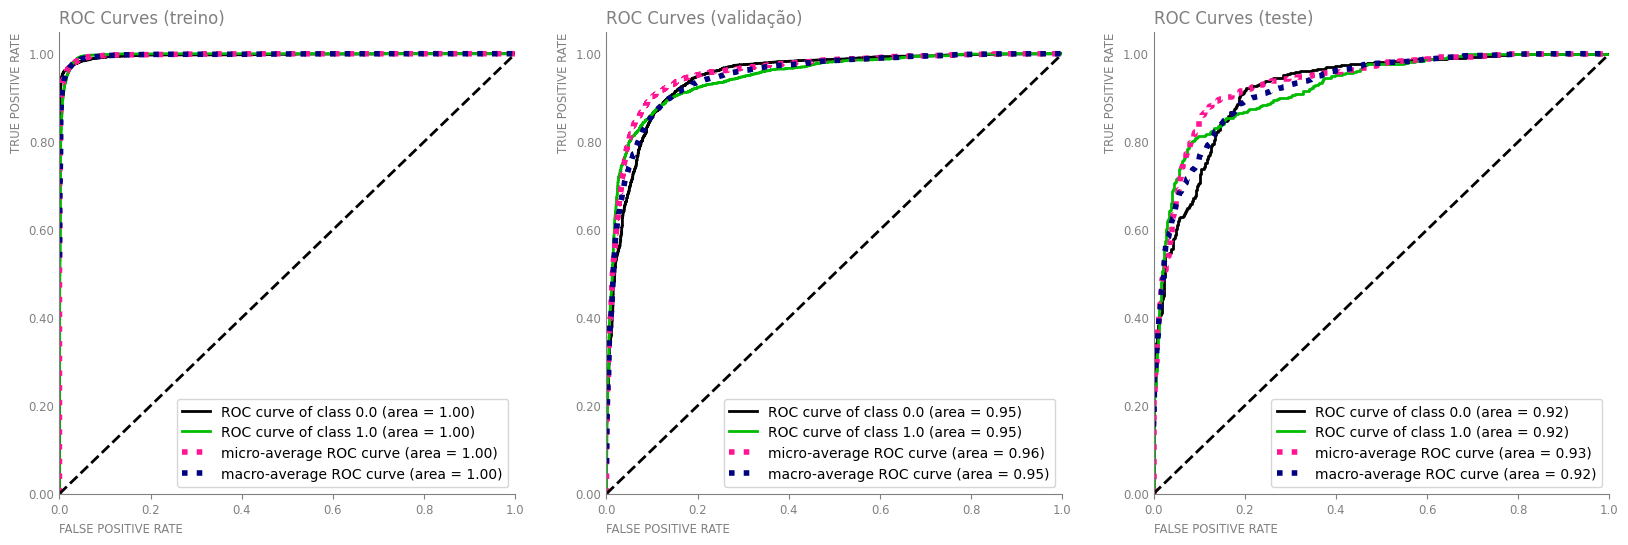

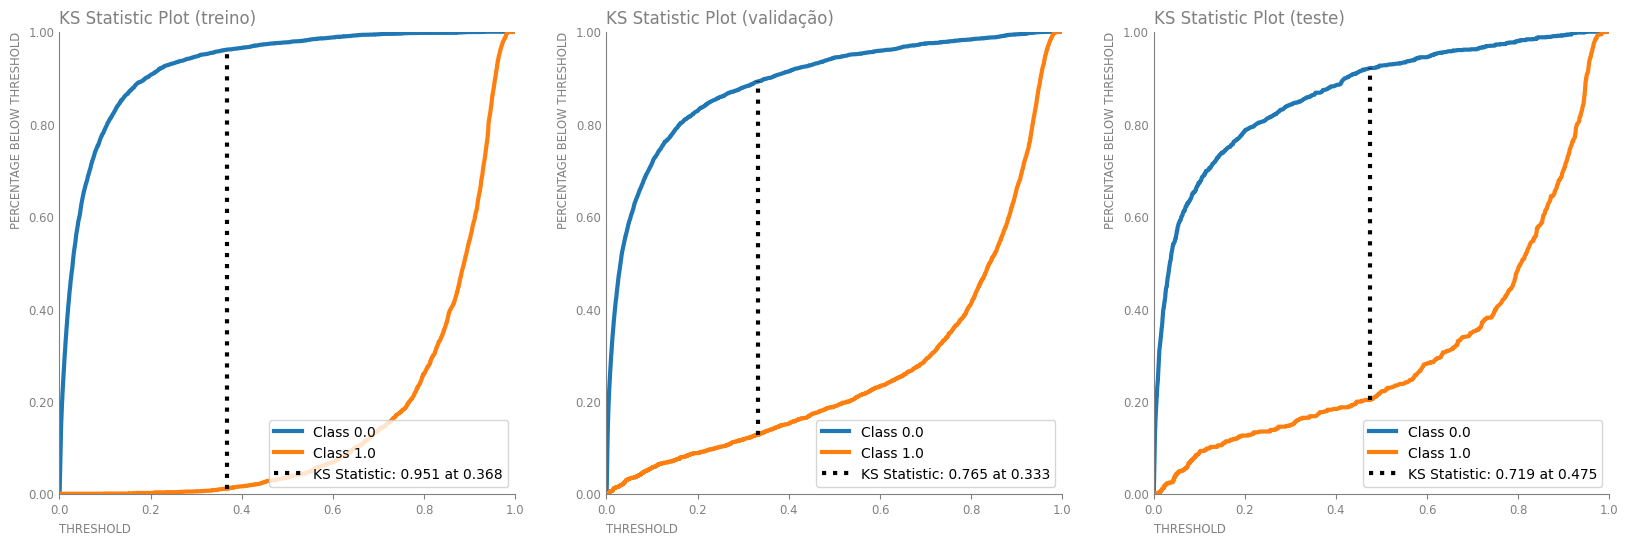

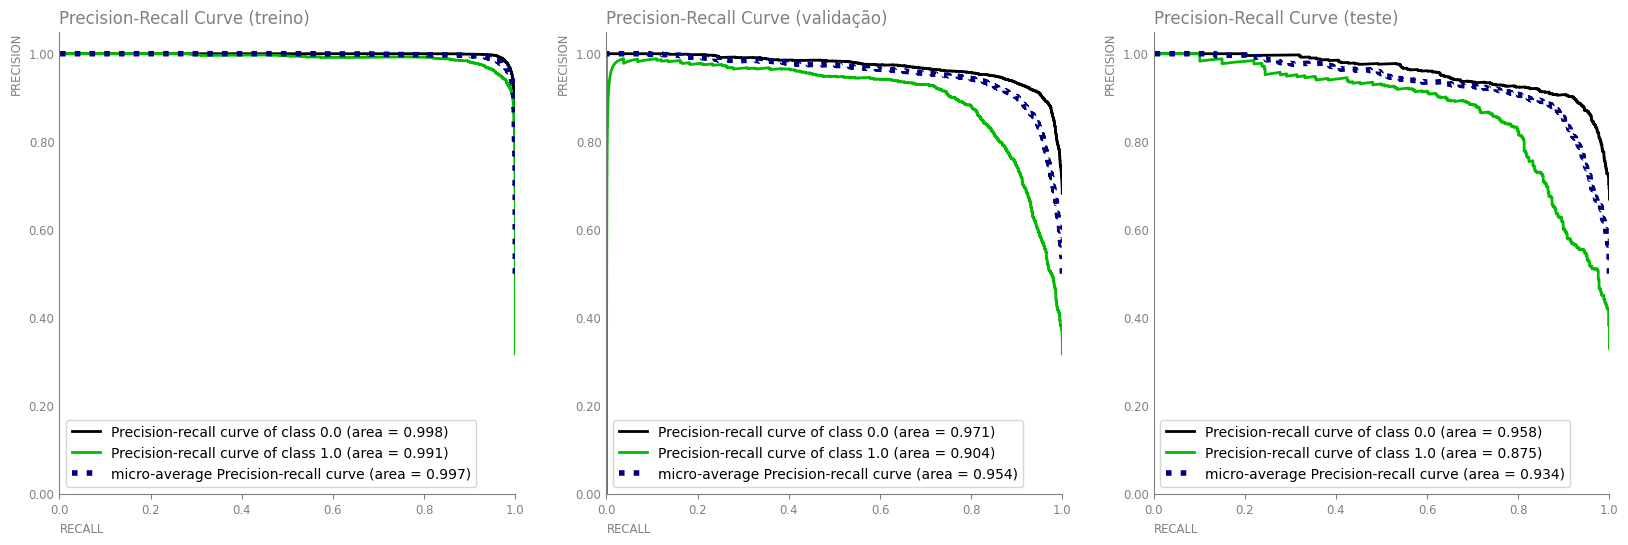

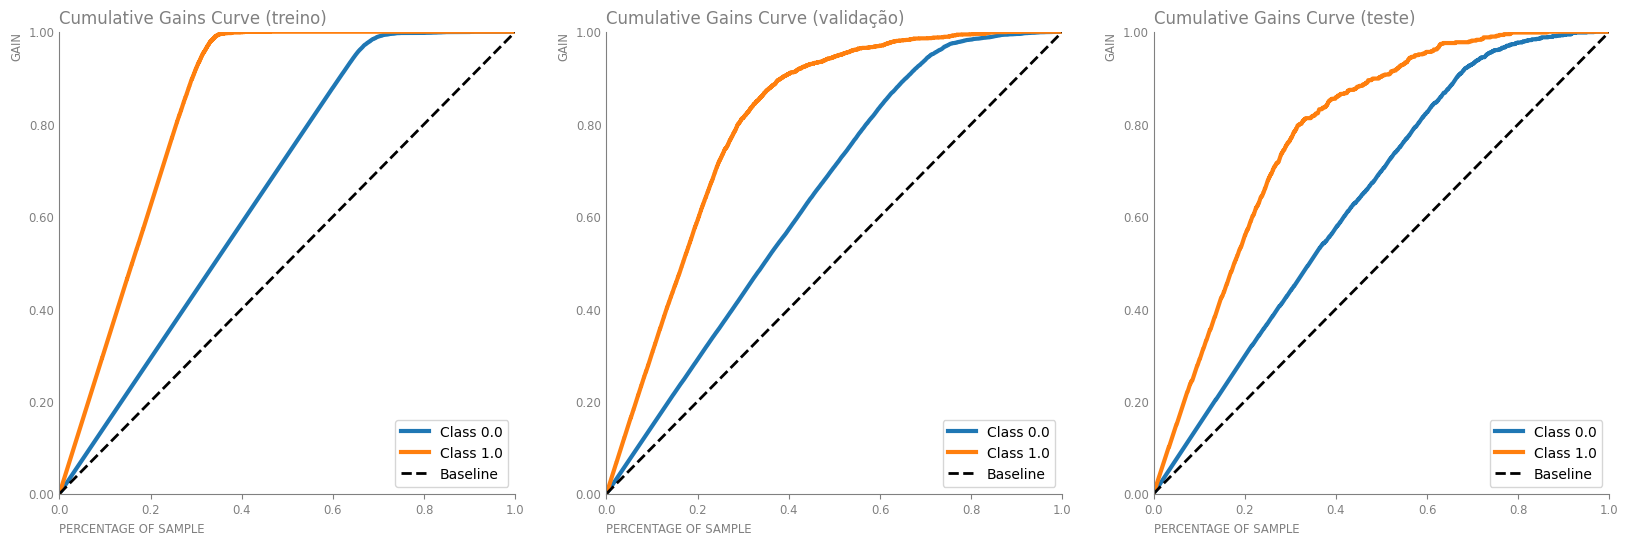

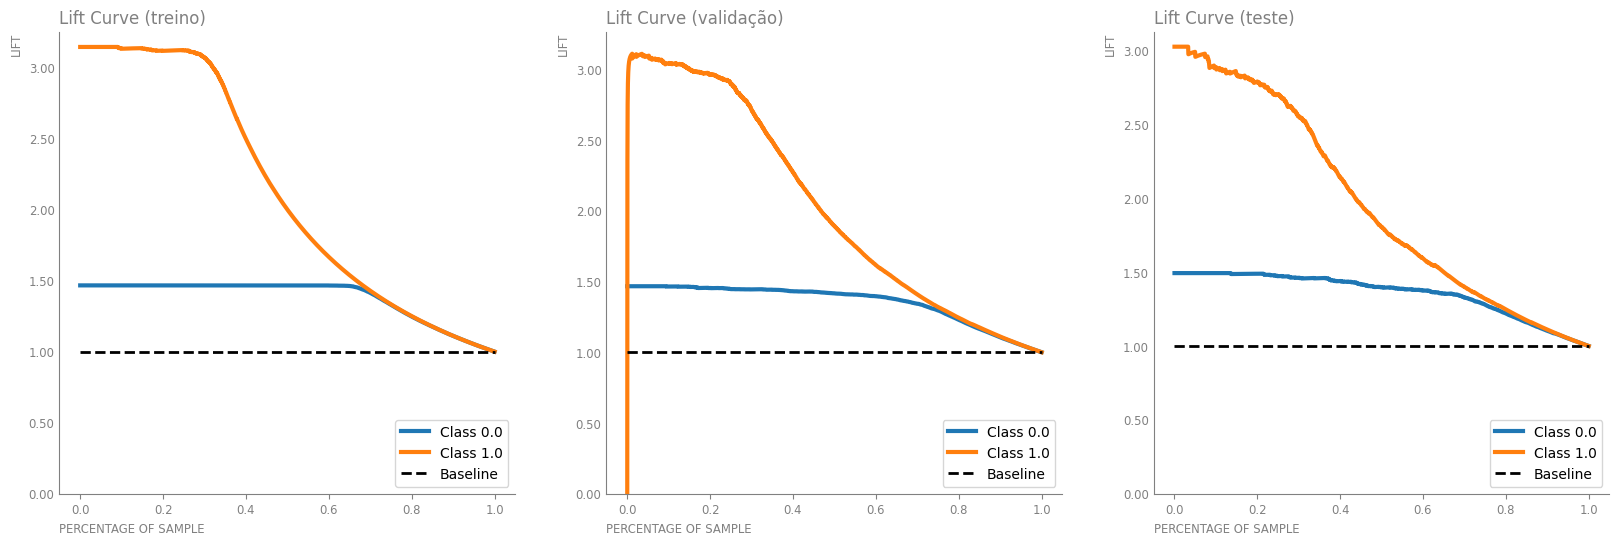

Generating shap plots...


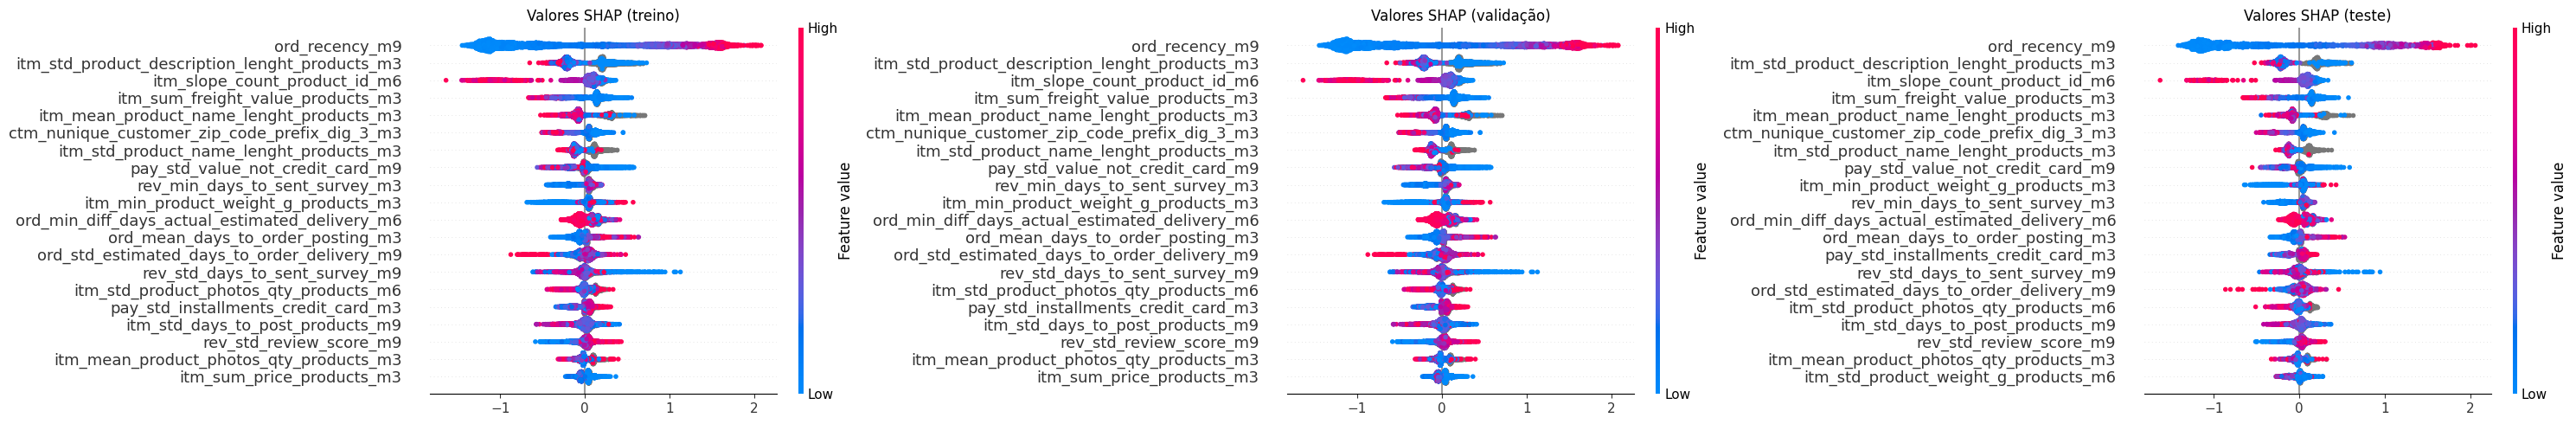

Generating learning curve...


In [14]:
X_dev_here = X_dev[selected_features_corr]
X_oot_here = X_oot[selected_features_corr]
cat_vars_here = [col for col in X_dev_here.select_dtypes('category').columns]
num_vars_here = [col for col in X_dev_here.columns if col not in cat_vars]
model_here = get_model(X_dev_here,cat_vars_here, num_vars_here,
                       model_type=ModelType.LGBM)
mlflow_experiment_run_cv(model_here, X_dev_here, X_oot_here,
                         y_dev, y_oot,
                         cohort_dev, cohort_oot,
                         n_percentiles=5,
                         n_folds=5,
                         optuna_study=None,
                         metric_plots=True,
                         learning_curve_plot=True,
                         shap_plots=True,
                         mlflow_log=True,
                         run_name='corr80',
                         nested_run=False,
                         log_datasets=False,
                         log_model=False,
                         log_features=True,
                         features=selected_features_corr)

## Drop zero importance


In [122]:
model.fit(X_dev[selected_features_corr],y_dev)

Pipeline(steps=[('cat_imputer',
                 CategoricalImputer(variables=['sel_seller_state'])),
                ('rare_encoder',
                 RareLabelEncoder(variables=['sel_seller_state'])),
                ('estimator', LGBMClassifier(random_state=42, verbosity=-1))])

In [123]:
feature_importance = model[-1].feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_dev[selected_features_corr].columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
print('There is no features with 0 importance')
importance_df

There is no features with 0 importance


Feature  Importance
83                    rev_std_days_to_sent_survey_m9          94
27                                    ord_recency_m9          83
14      ord_mean_estimated_days_to_order_delivery_m6          82
20       ord_std_estimated_days_to_order_delivery_m9          77
23                  ord_std_days_to_order_posting_m9          67
94               pay_min_installments_credit_card_m9          61
80                           rev_std_review_score_m9          59
81                    rev_std_delay_answer_review_m9          59
66                  itm_std_days_to_post_products_m9          58
95                  pay_std_value_not_credit_card_m9          56
62              itm_std_product_weight_g_products_m6          56
60                 itm_min_freight_value_products_m6          55
59                 itm_std_freight_value_products_m6          52
57                         itm_sum_price_products_m6          49
40    itm_min_product_description_lenght_products_m3          48
35          itm_mean_product_name_lenght_products_m3          48
6                  ord_mean_days_to_order_posting_m3          47
39    itm_max_product_description_lenght_products_m3          45
32                 itm_sum_freight_value_products_m3          45
19    ord_min_diff_days_actual_estimated_delivery_m6          44
25                 ord_min_days_to_order_delivery_m9          42
26    ord_max_diff_days_actual_estimated_delivery_m9          42
82                    rev_min_delay_answer_review_m9          41
58                         itm_std_price_products_m6          39
41           itm_mean_product_photos_qty_products_m3          39
43              itm_min_product_weight_g_products_m3          38
67                  itm_min_days_to_post_products_m9          37
47            itm_mean_product_height_cm_products_m3          37
42             itm_mean_product_weight_g_products_m3          36
53                 itm_mean_days_to_post_products_m3          36
50             itm_mean_product_width_cm_products_m3          36
61            itm_std_product_photos_qty_products_m6          36
63                  itm_std_days_to_post_products_m6          36
38    itm_std_product_description_lenght_products_m3          35
85                                  pay_max_value_m3          34
100              geo_min_distance_customer_seller_m3          34
99               geo_max_distance_customer_seller_m3          33
16                  ord_std_days_to_order_posting_m6          33
91                  pay_max_value_not_credit_card_m3          33
31                         itm_min_price_products_m3          32
88              pay_mean_installments_credit_card_m3          31
65                     itm_slope_count_product_id_m6          31
24                  ord_min_days_to_order_posting_m9          29
86                                  pay_min_value_m3          29
92                  pay_min_value_not_credit_card_m3          29
49             itm_min_product_height_cm_products_m3          28
17                 ord_std_days_to_order_delivery_m6          28
30                         itm_max_price_products_m3          28
97              geo_mean_distance_customer_seller_m3          27
7                   ord_std_days_to_order_posting_m3          27
21                ord_mean_days_to_order_approval_m9          26
36           itm_std_product_name_lenght_products_m3          26
78                    rev_std_delay_answer_review_m6          26
84                                  pay_std_value_m3          25
18                 ord_min_days_to_order_delivery_m6          24
72                   rev_mean_days_to_sent_survey_m3          23
69                           rev_std_review_score_m3          23
15                 ord_std_days_to_order_approval_m6          22
33                 itm_max_freight_value_products_m3          22
22                 ord_std_days_to_order_approval_m9          22
64                            itm_slope_sum_price_m6          21
37           it

## Feature shuffling


In [127]:
pipe_steps = copy.deepcopy(model.steps)

pipe_steps.insert(-1,('select_shuffling', SelectByShuffling(estimator=model[-1],
                                                            cv=skf,
                                                            random_state=random_state)))
feature_pipe = Pipeline(pipe_steps)
feature_pipe

Pipeline(steps=[('cat_imputer',
                 CategoricalImputer(variables=['sel_seller_state'])),
                ('rare_encoder',
                 RareLabelEncoder(variables=['sel_seller_state'])),
                ('select_shuffling',
                 SelectByShuffling(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                                   estimator=LGBMClassifier(random_state=42,
                                                            verbosity=-1),
                                   random_state=42)),
                ('estimator', LGBMClassifier(random_state=42, verbosity=-1))])

In [129]:
feature_pipe.fit(X_dev[selected_features_corr],y_dev)

Pipeline(steps=[('cat_imputer',
                 CategoricalImputer(variables=['sel_seller_state'])),
                ('rare_encoder',
                 RareLabelEncoder(variables=['sel_seller_state'])),
                ('select_shuffling',
                 SelectByShuffling(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                                   estimator=LGBMClassifier(random_state=42,
                                                            verbosity=-1),
                                   random_state=42)),
                ('estimator', LGBMClassifier(random_state=42, verbosity=-1))])

In [133]:
selected_features_corr_byShuffle = feature_pipe[-2].get_feature_names_out()
len(selected_features_corr_byShuffle),selected_features_corr_byShuffle


(
    31,
    [
        'ord_mean_days_to_order_posting_m3',
        'ord_mean_estimated_days_to_order_delivery_m6',
        'ord_min_diff_days_actual_estimated_delivery_m6',
        'ord_std_estimated_days_to_order_delivery_m9',
        'ord_std_days_to_order_posting_m9',
        'ord_min_days_to_order_delivery_m9',
        'ord_max_diff_days_actual_estimated_delivery_m9',
        'ord_recency_m9',
        'itm_min_price_products_m3',
        'itm_sum_freight_value_products_m3',
        'itm_mean_product_name_lenght_products_m3',
        'itm_max_product_description_lenght_products_m3',
        'itm_min_product_description_lenght_products_m3',
        'itm_min_product_weight_g_products_m3',
        'itm_sum_price_products_m6',
        'itm_std_price_products_m6',
        'itm_std_freight_value_products_m6',
        'itm_min_freight_value_products_m6',
        'itm_std_product_photos_qty_products_m6',
        'itm_std_product_weight_g_products_m6',
        'itm_slope_count_product_id_

In [159]:
proba = cross_val_predict(model,X_dev[selected_features_corr_byShuffle],y_dev,cv=skf,method='predict_proba')[:,1]
roc_auc_score(y_dev,proba)

0.9476196637283372

## Catboost selection


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

10


[
    'ord_mean_estimated_days_to_order_delivery_m6',
    'ord_min_diff_days_actual_estimated_delivery_m6',
    'ord_recency_m9',
    'itm_sum_price_products_m3',
    'itm_sum_freight_value_products_m3',
    'itm_mean_product_name_lenght_products_m3',
    'itm_std_product_description_lenght_products_m3',
    'itm_sum_price_products_m6',
    'itm_std_days_to_post_products_m9',
    'rev_std_days_to_sent_survey_m9'
]

Number of features: 10
Calculating cross validation metrics...
Calculating training metrics...
Calculating oot metrics...
AUC (dev): 0.9240479915673732
KS (dev): 0.7148021949631589
AUCPR (dev): 0.8614433781080318
BRIER LOSS (dev): 0.09590314365919102
LOG LOSS (dev): 0.31900564495430794
AUC (train): 0.983785877416888
KS (train): 0.8817641551355317
AUCPR (train): 0.9604172316918294
BRIER LOSS (train): 0.051107756813672134
LOG LOSS (train): 0.19020742332991408
AUC (oot): 0.9061902290979081
KS (oot): 0.6502757380669374
AUCPR (oot): 0.8380737415514754
BRIER LOSS (oot): 0.11274681716414145
LOG LOSS (oot): 0.35968636592824865
ACC (dev): 0.8123995715050883
Recall (dev): 0.44084210526315787
Precision (dev): 0.9348214285714286
F1 (dev): 0.5991416309012876
Recall-0 (dev): 0.9856666012173572
Precision-0 (dev): 0.7908002520478891
ACC (oot): 0.7995378393991912
Recall (oot): 0.4230769230769231
Precision (oot): 0.9343629343629344
F1 (oot): 0.5824308062575211
Recall-0 (oot): 0.9853321829163072
Precisio

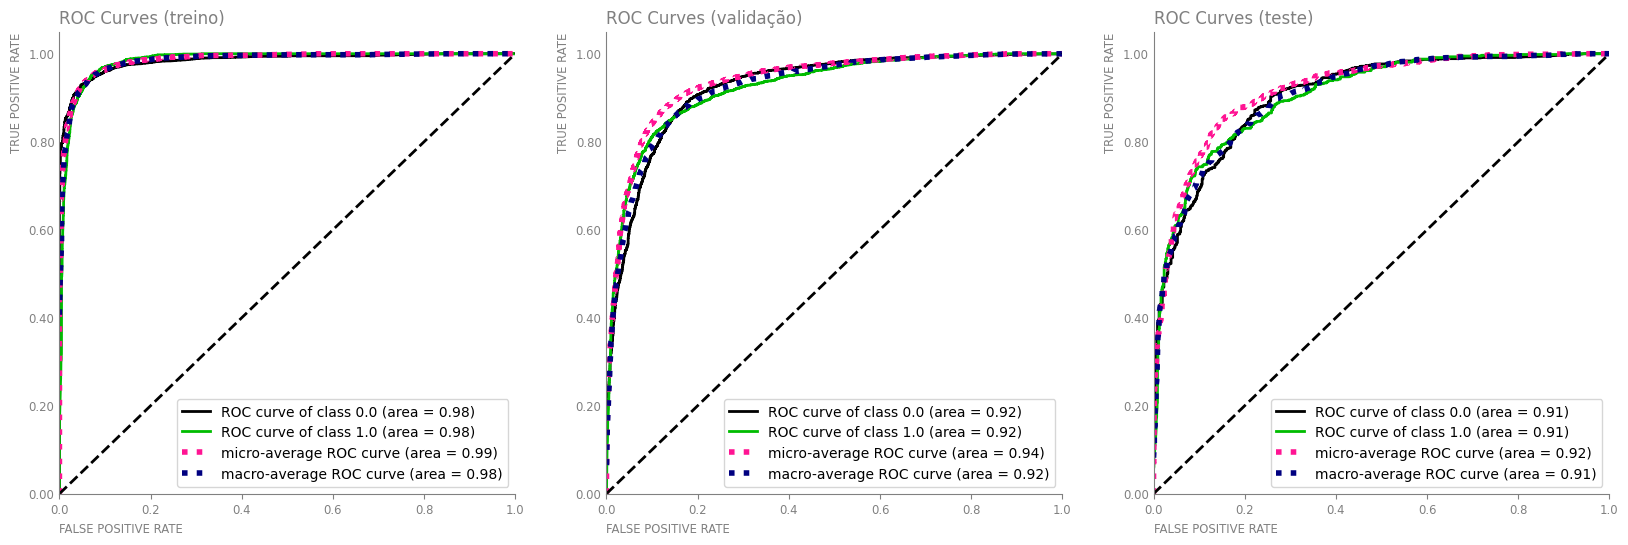

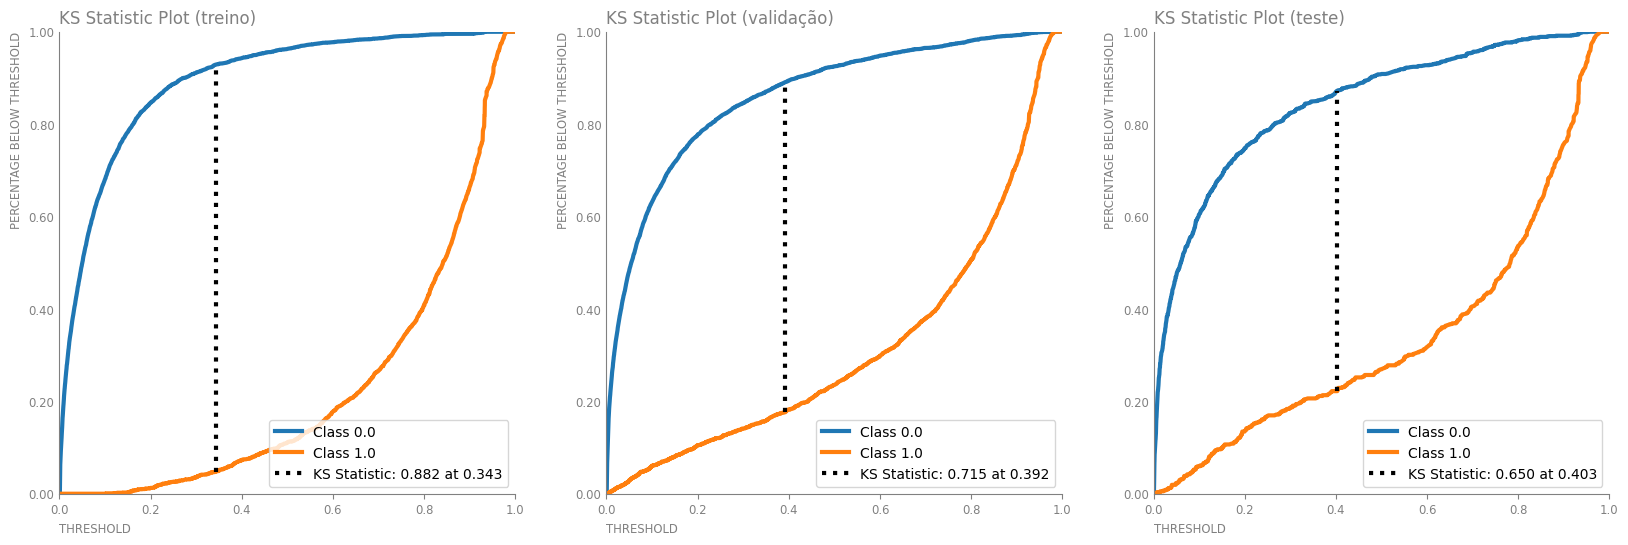

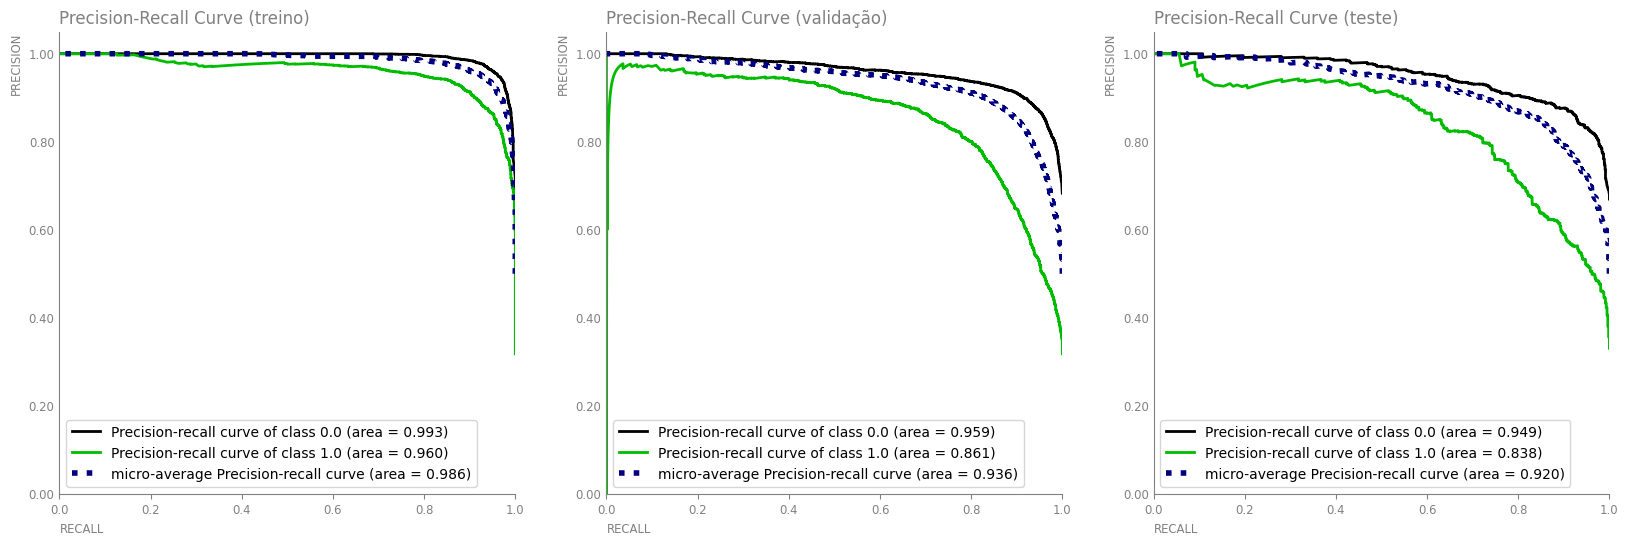

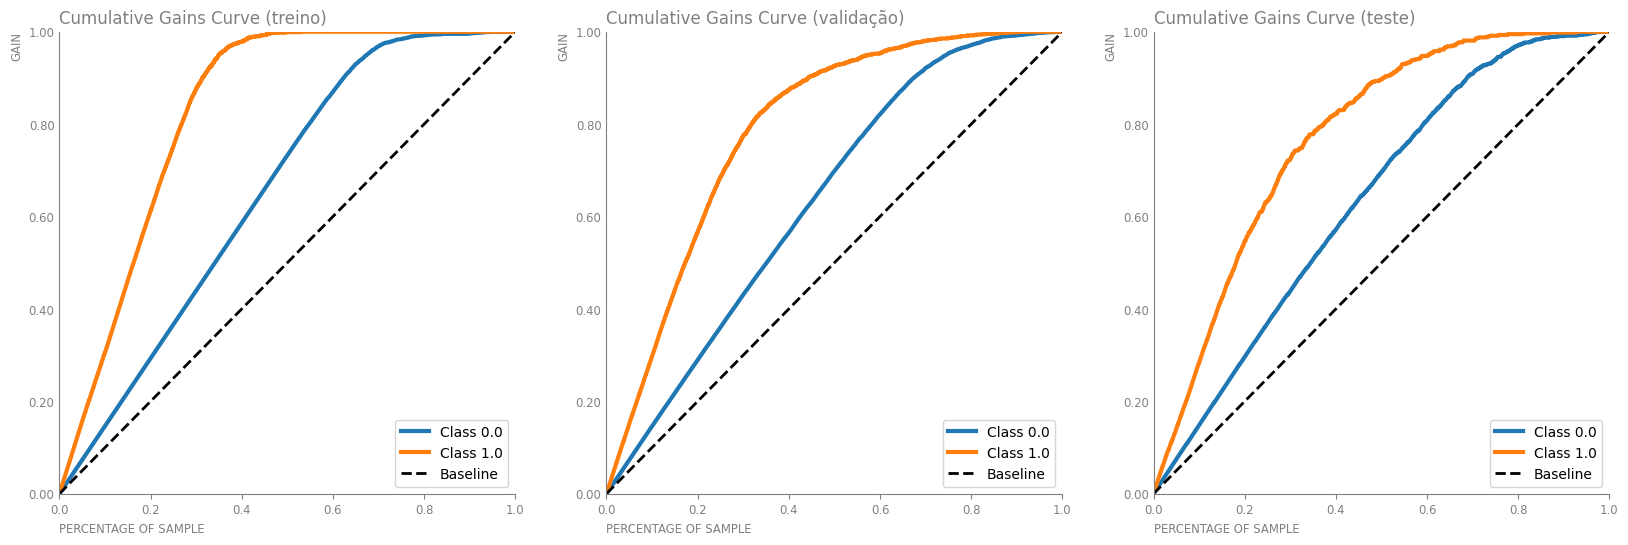

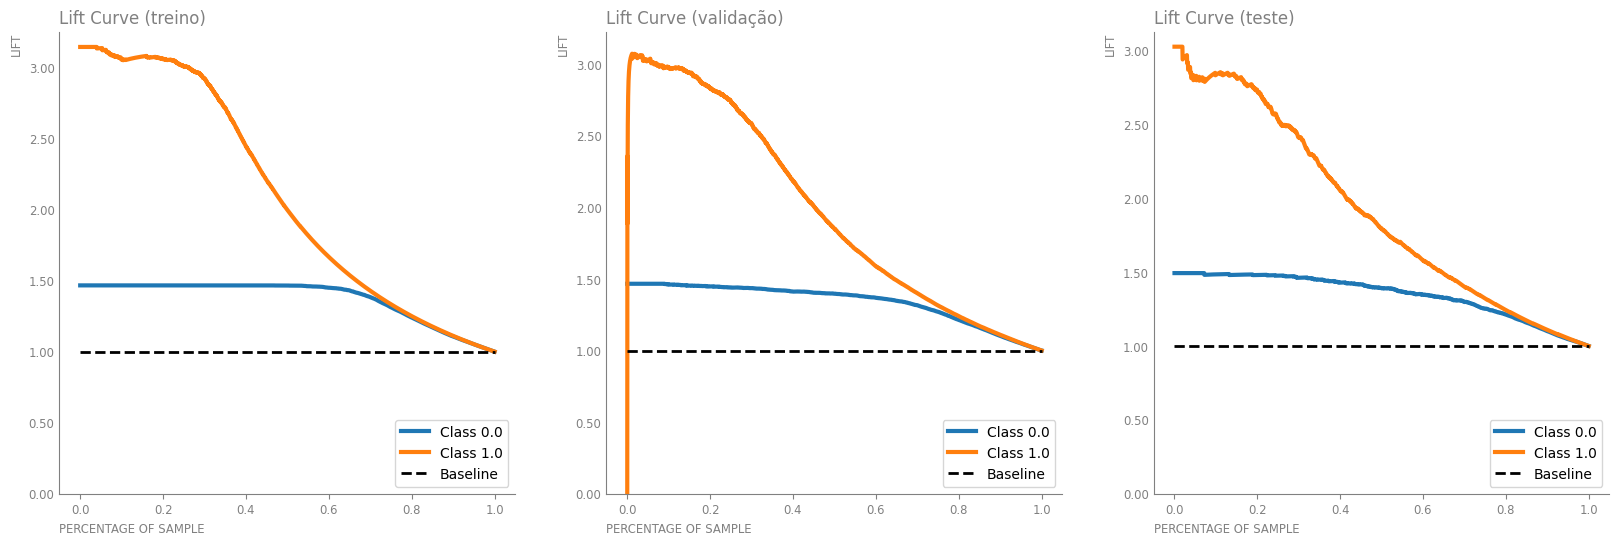

Generating shap plots...


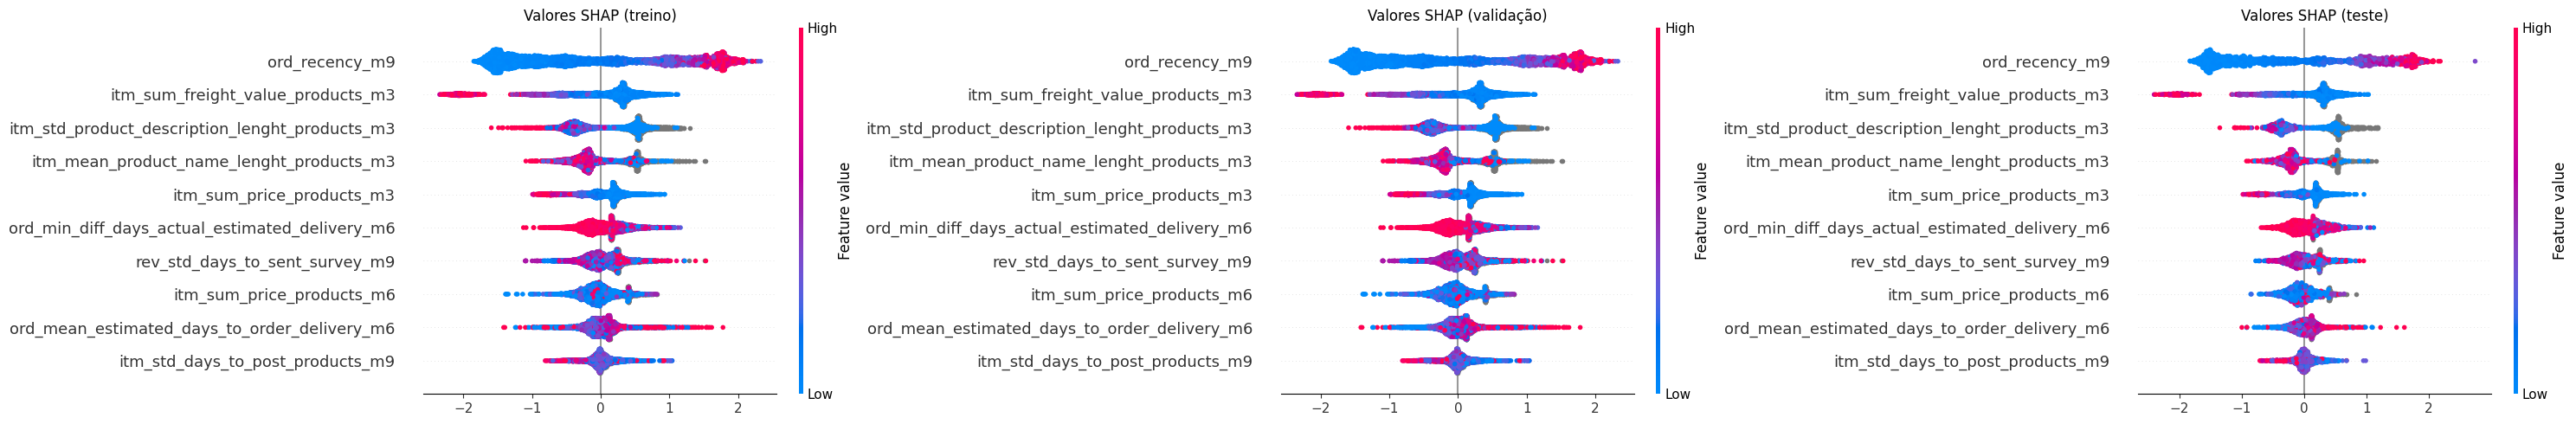

Generating learning curve...


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

15


[
    'ord_mean_estimated_days_to_order_delivery_m6',
    'ord_min_diff_days_actual_estimated_delivery_m6',
    'ord_std_estimated_days_to_order_delivery_m9',
    'ord_min_days_to_order_delivery_m9',
    'ord_recency_m9',
    'itm_sum_price_products_m3',
    'itm_sum_freight_value_products_m3',
    'itm_mean_product_name_lenght_products_m3',
    'itm_min_product_name_lenght_products_m3',
    'itm_std_product_description_lenght_products_m3',
    'itm_max_product_description_lenght_products_m3',
    'itm_sum_price_products_m6',
    'itm_min_freight_value_products_m6',
    'itm_std_days_to_post_products_m9',
    'rev_std_days_to_sent_survey_m9'
]

Number of features: 15
Calculating cross validation metrics...
Calculating training metrics...
Calculating oot metrics...
AUC (dev): 0.9339710851839987
KS (dev): 0.7378226048136245
AUCPR (dev): 0.8809211389864511
BRIER LOSS (dev): 0.0877074487848353
LOG LOSS (dev): 0.2967383323448299
AUC (train): 0.9892874223650624
KS (train): 0.9084455651203406
AUCPR (train): 0.9736931501280985
BRIER LOSS (train): 0.04259900598142455
LOG LOSS (train): 0.16747986612040014
AUC (oot): 0.9188096200606987
KS (oot): 0.6869437723622366
AUCPR (oot): 0.8564535598470904
BRIER LOSS (oot): 0.10436113018927157
LOG LOSS (oot): 0.33531368592502325
ACC (dev): 0.815345474022496
Recall (dev): 0.4454736842105263
Precision (dev): 0.9446428571428571
F1 (dev): 0.6054363376251788
Recall-0 (dev): 0.9878264284311801
Precision-0 (dev): 0.7925330812854442
ACC (oot): 0.7983824378971692
Recall (oot): 0.42132867132867136
Precision (oot): 0.9305019305019305
F1 (oot): 0.5800240673886884
Recall-0 (oot): 0.9844693701466781
Precision-0

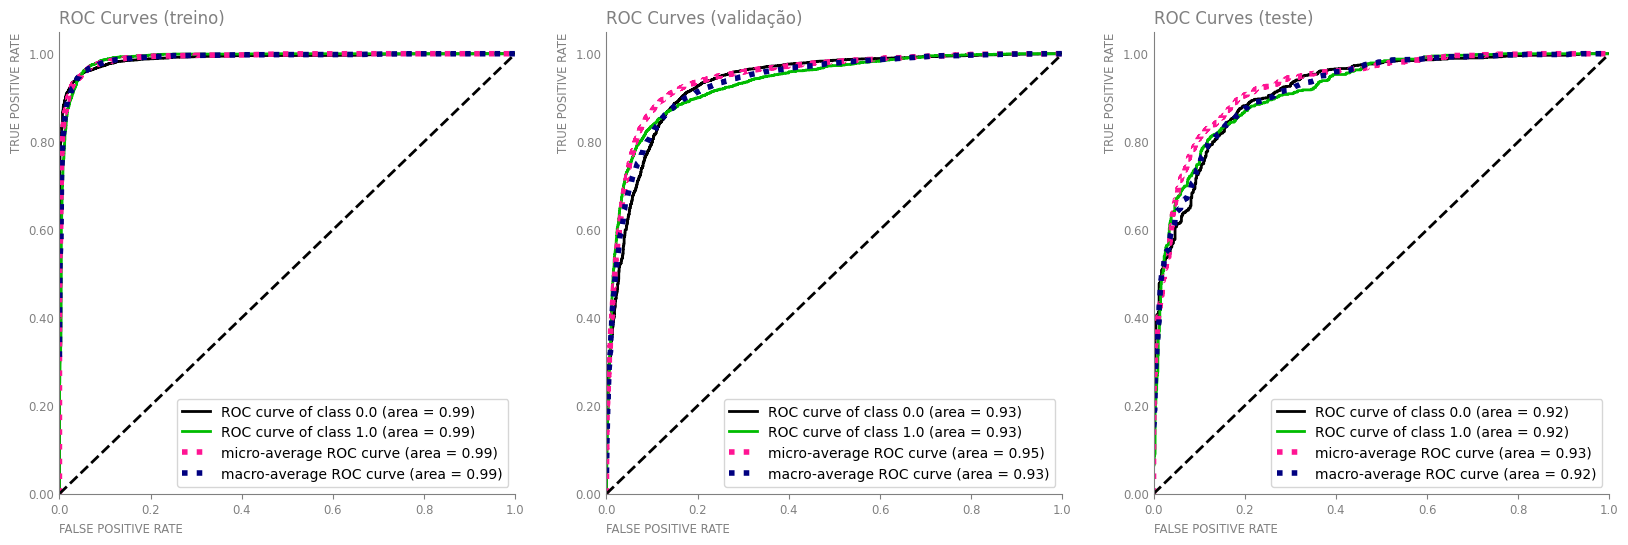

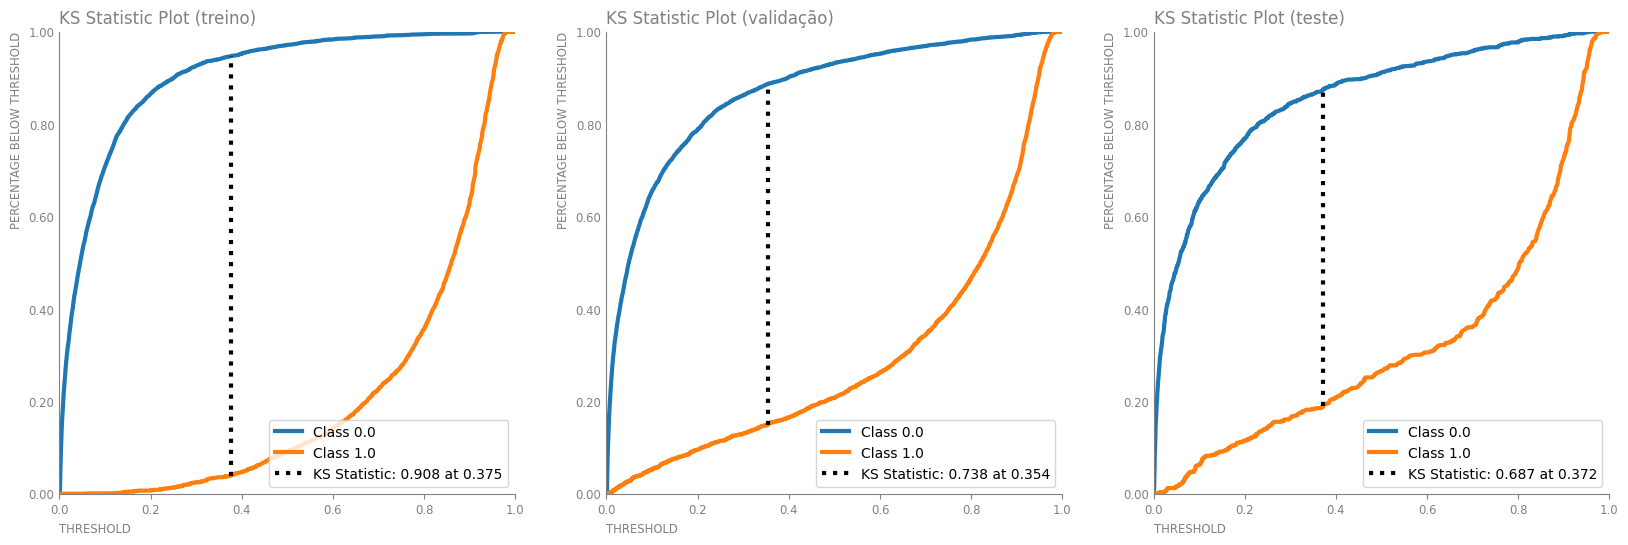

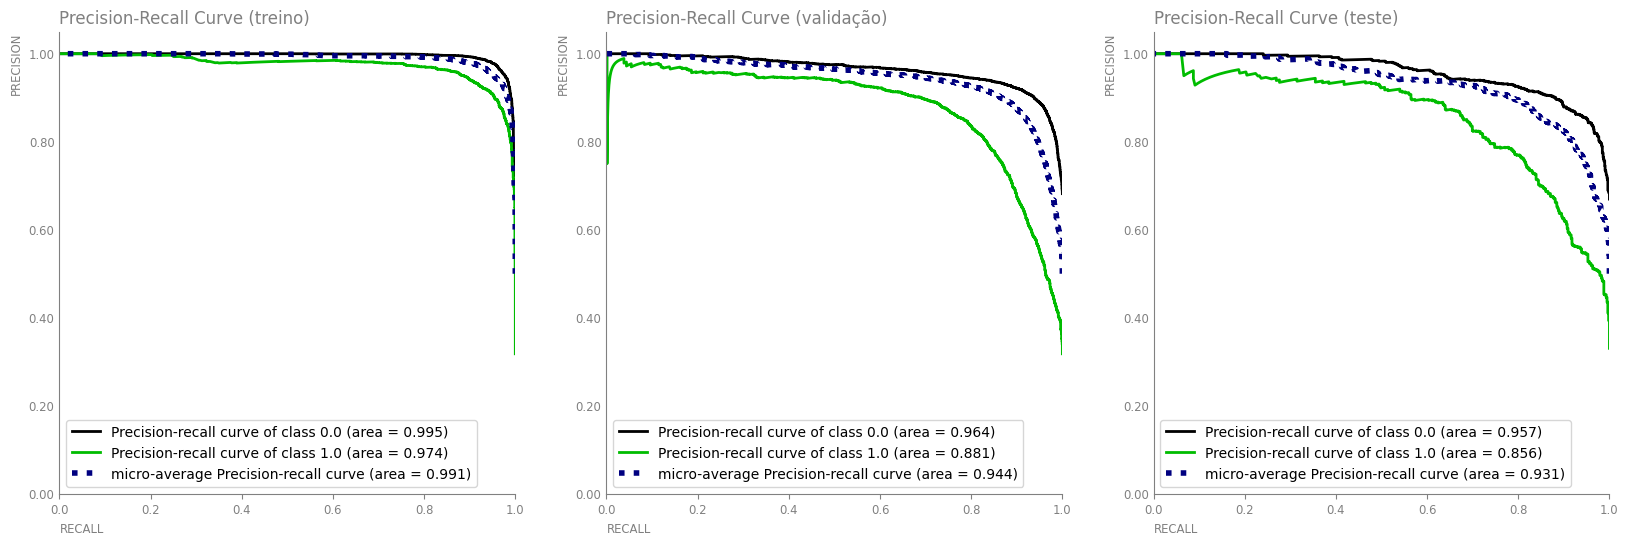

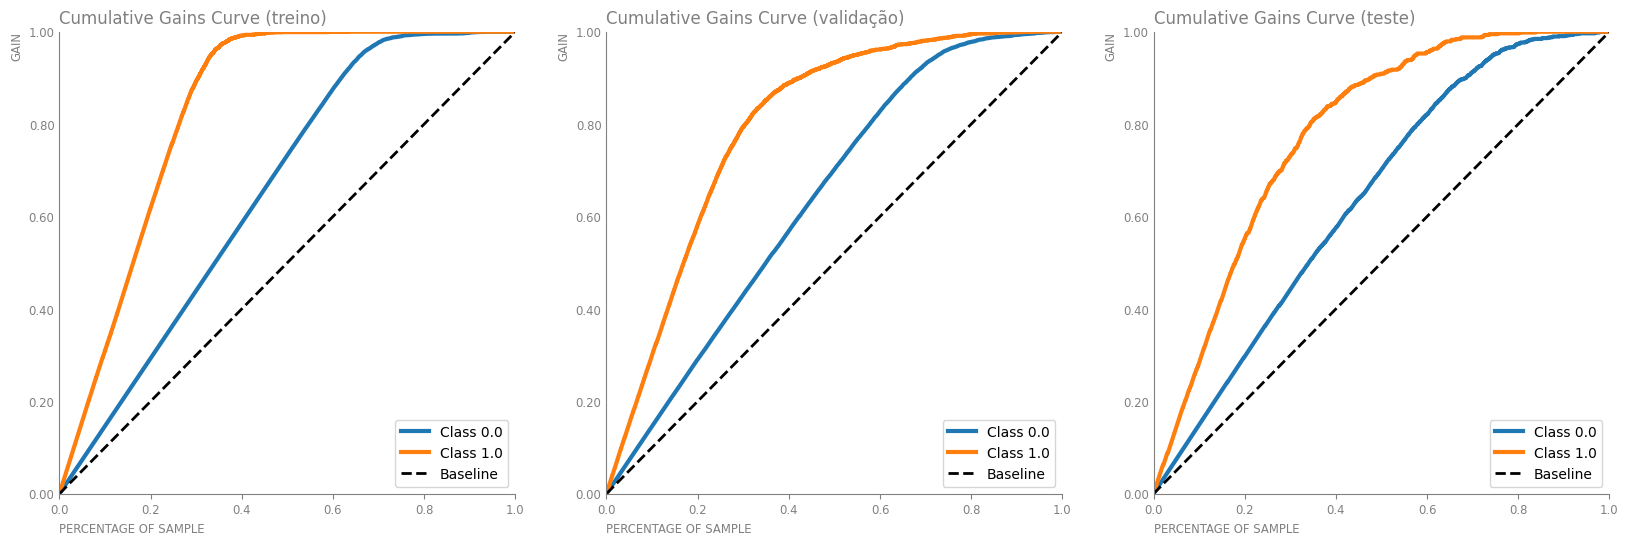

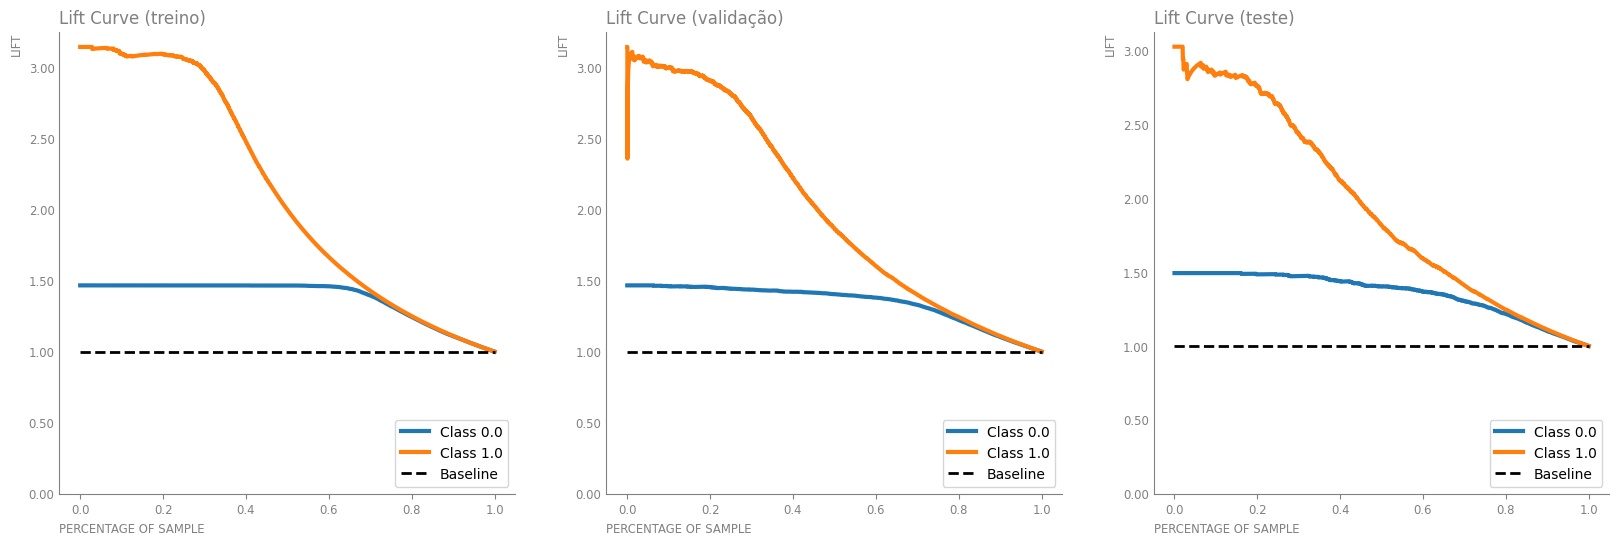

Generating shap plots...


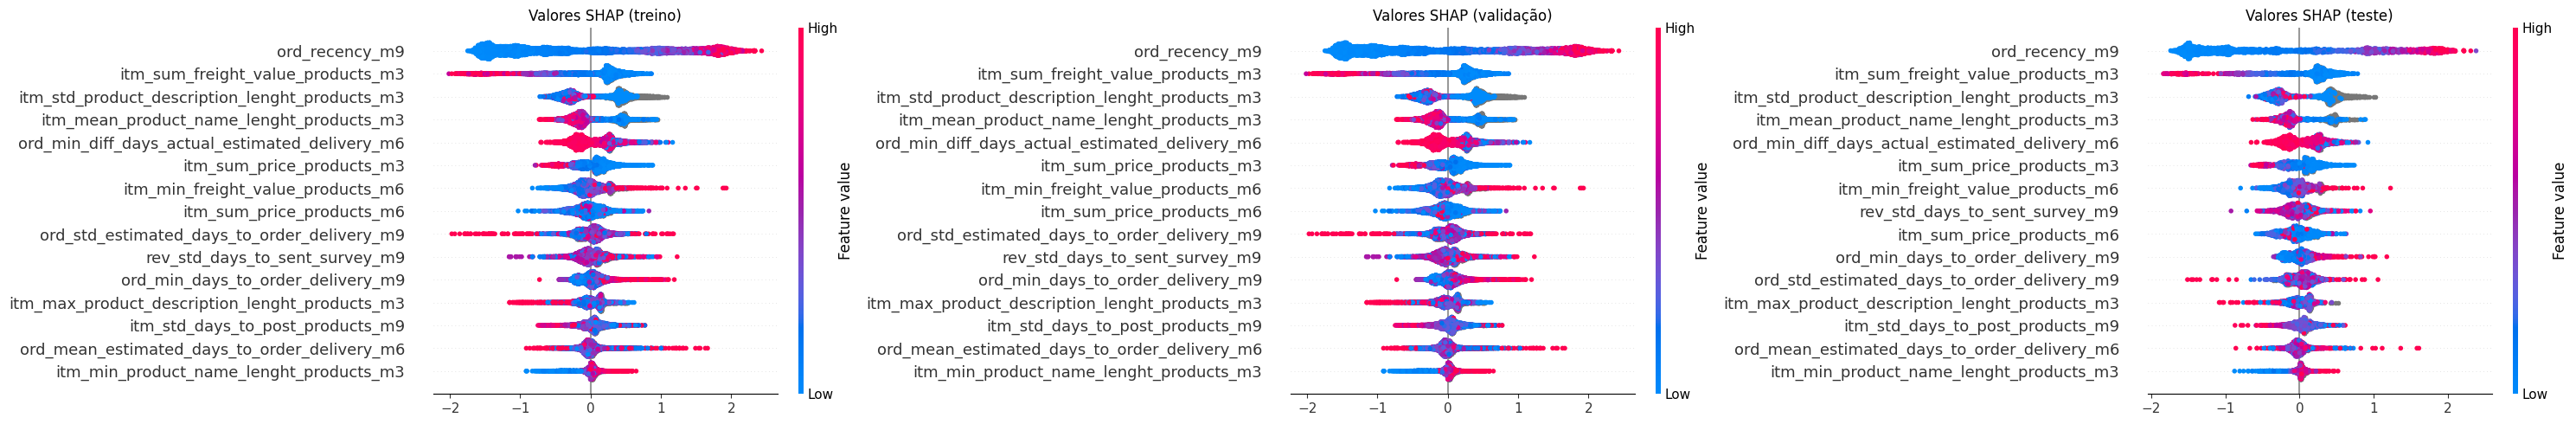

Generating learning curve...


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

20


[
    'ord_mean_days_to_order_posting_m3',
    'ord_mean_estimated_days_to_order_delivery_m6',
    'ord_min_diff_days_actual_estimated_delivery_m6',
    'ord_std_estimated_days_to_order_delivery_m9',
    'ord_min_days_to_order_delivery_m9',
    'ord_max_diff_days_actual_estimated_delivery_m9',
    'ord_recency_m9',
    'itm_min_price_products_m3',
    'itm_sum_freight_value_products_m3',
    'itm_mean_product_name_lenght_products_m3',
    'itm_min_product_name_lenght_products_m3',
    'itm_std_product_description_lenght_products_m3',
    'itm_max_product_description_lenght_products_m3',
    'itm_min_product_description_lenght_products_m3',
    'itm_sum_price_products_m6',
    'itm_min_freight_value_products_m6',
    'itm_std_days_to_post_products_m9',
    'rev_std_days_to_sent_survey_m9',
    'pay_max_value_m3',
    'pay_min_installments_credit_card_m9'
]

Number of features: 20
Calculating cross validation metrics...
Calculating training metrics...
Calculating oot metrics...
AUC (dev): 0.9397800489836411
KS (dev): 0.7525095952132442
AUCPR (dev): 0.8915476153373426
BRIER LOSS (dev): 0.08343486445636447
LOG LOSS (dev): 0.2836768579966334
AUC (train): 0.9911558279165418
KS (train): 0.9112816559364246
AUCPR (train): 0.9790704044191945
BRIER LOSS (train): 0.039711315629980565
LOG LOSS (train): 0.1581312194619314
AUC (oot): 0.9247180774359376
KS (oot): 0.6881263688856442
AUCPR (oot): 0.8667576515351172
BRIER LOSS (oot): 0.10048549379541077
LOG LOSS (oot): 0.3247427607726993
ACC (dev): 0.8180235672201392
Recall (dev): 0.4496842105263158
Precision (dev): 0.9535714285714286
F1 (dev): 0.6111587982832618
Recall-0 (dev): 0.9897899077164736
Precision-0 (dev): 0.7941083805923126
ACC (oot): 0.7983824378971692
Recall (oot): 0.42132867132867136
Precision (oot): 0.9305019305019305
F1 (oot): 0.5800240673886884
Recall-0 (oot): 0.9844693701466781
Precision-

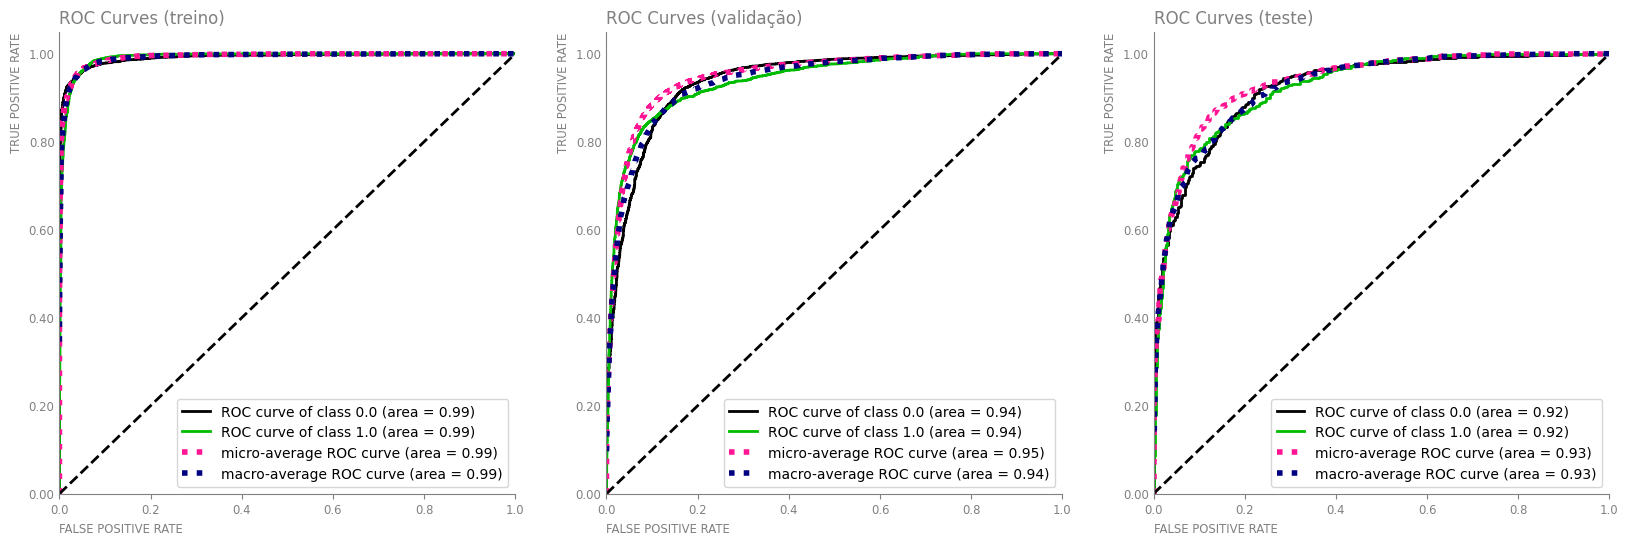

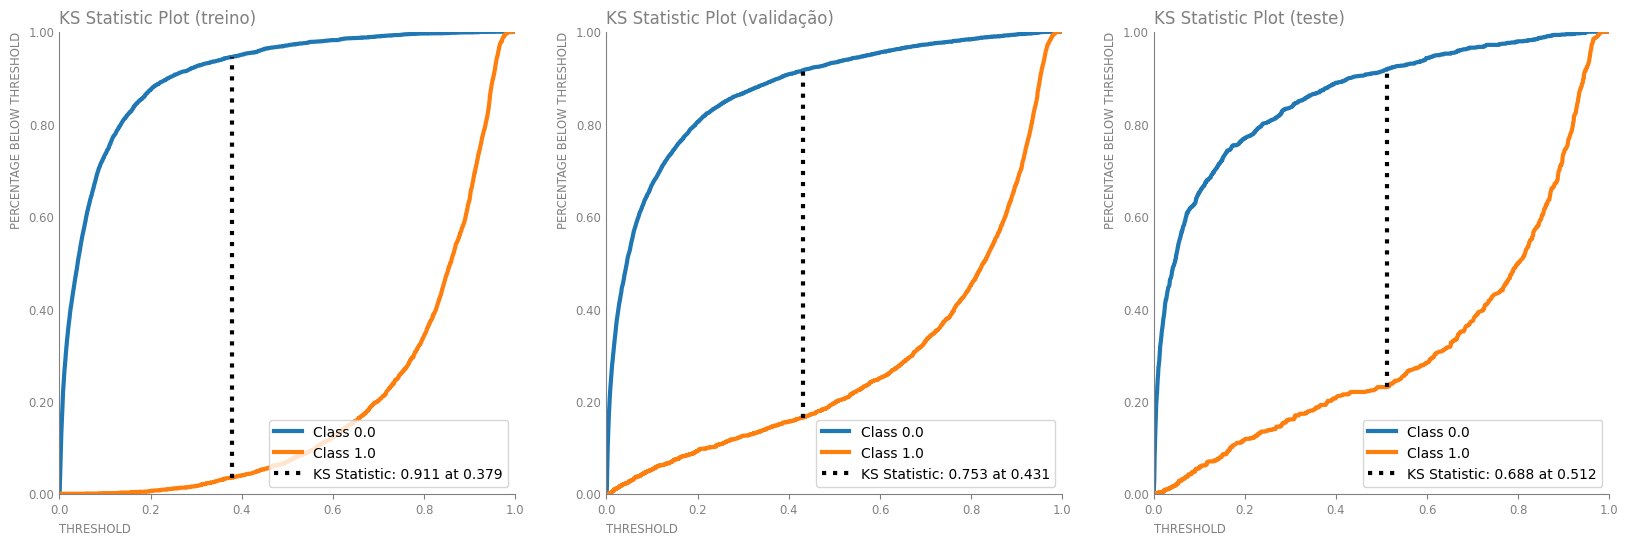

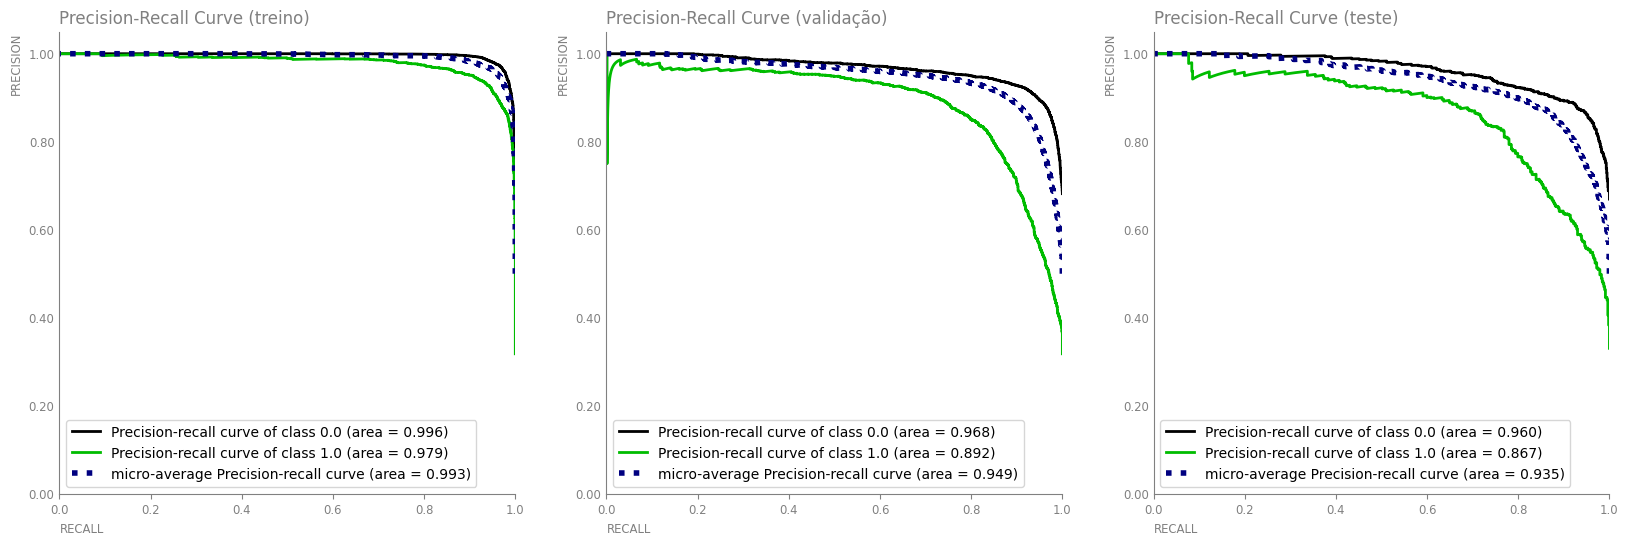

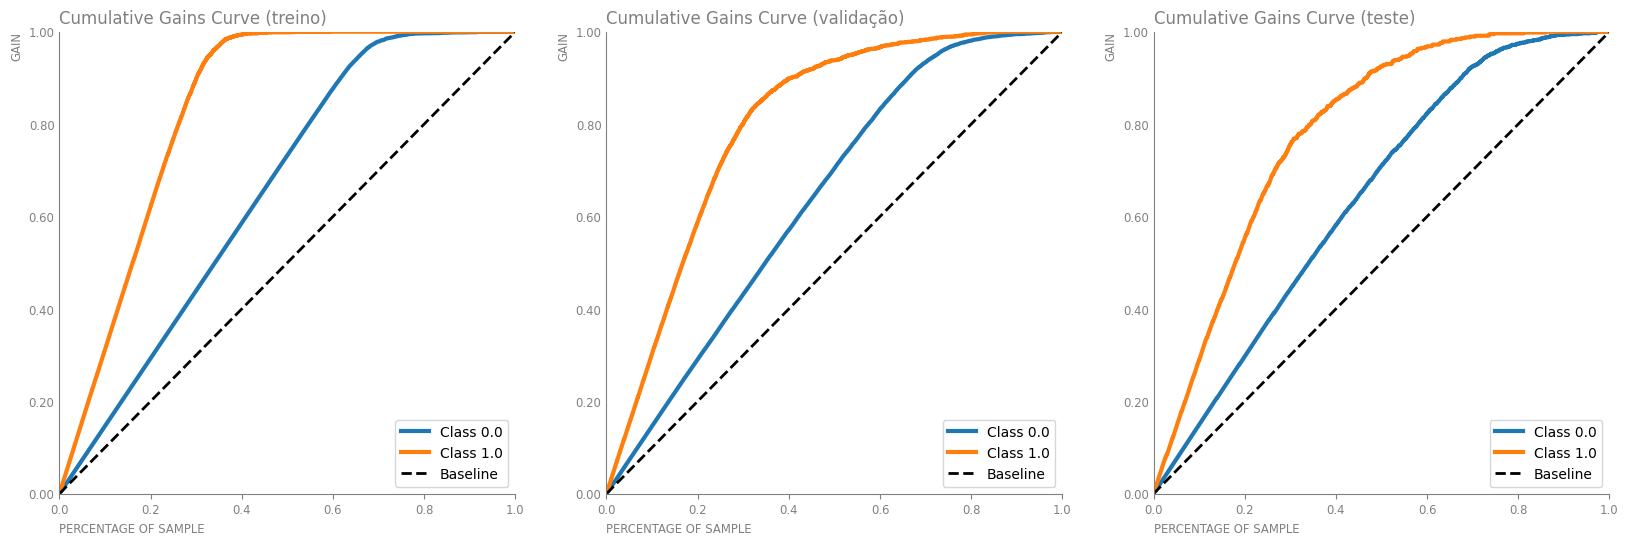

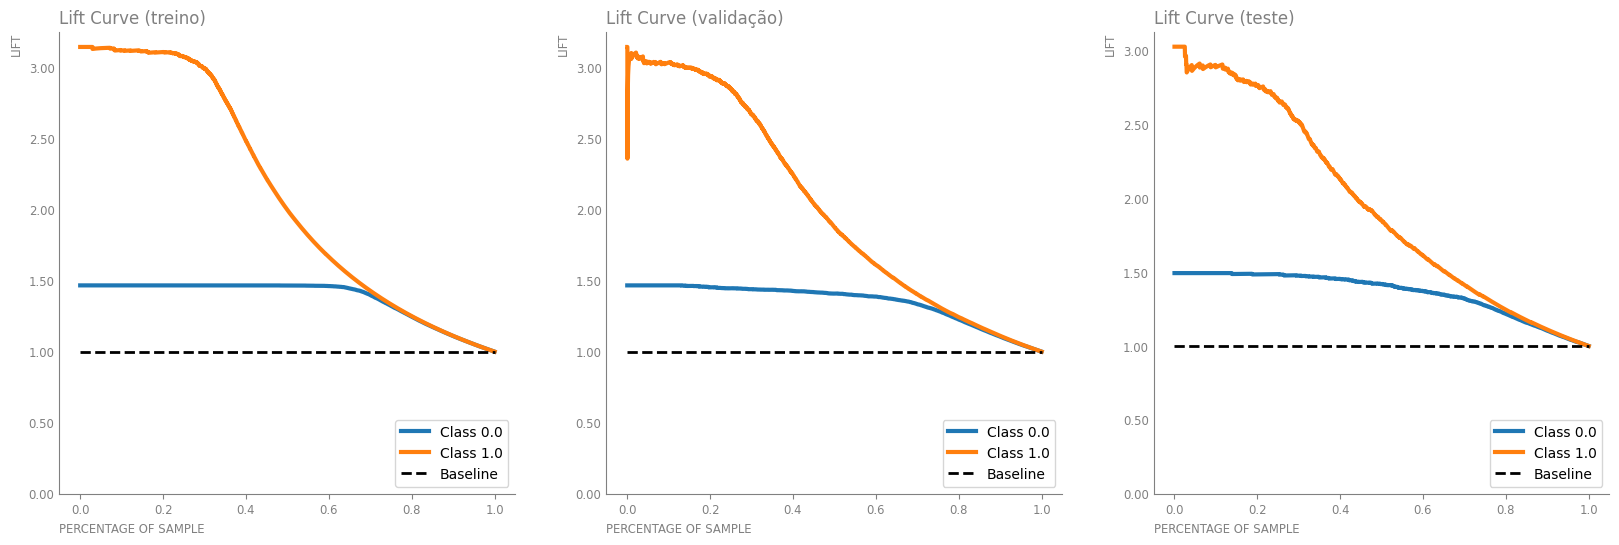

Generating shap plots...


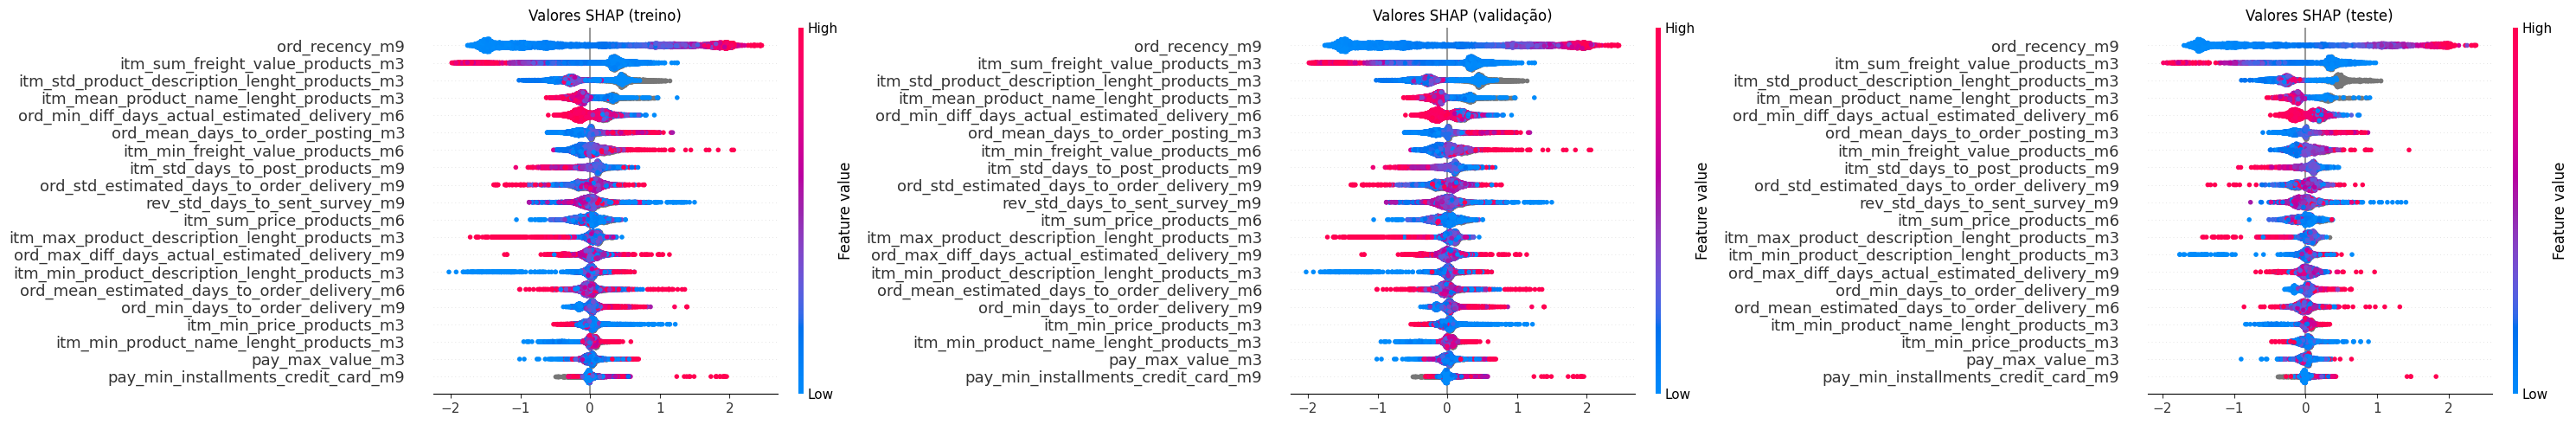

Generating learning curve...


In [16]:
transformer = model[:-1]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    train_X = transformer.fit_transform(X_dev[selected_features_corr])

cat_features = train_X.select_dtypes('category').columns.tolist()
train_pool = Pool(train_X, y_dev, 
                  cat_features=cat_features)

selector = CatBoostClassifier(random_state=random_state, eval_metric='AUC')
for n_feats in [10,15,20]:
    summary = selector.select_features(
        train_pool,
        features_for_select=train_X.columns.tolist(),
        num_features_to_select=n_feats,
        steps=3,
        algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues,
        shap_calc_type=EShapCalcType.Regular,
        train_final_model=False,
        logging_level='Silent',
        plot=True
    )
    selected_features_cat = summary['selected_features_names']
    display(len(selected_features_cat),selected_features_cat)
    X_dev_here = X_dev[selected_features_cat]
    X_oot_here = X_oot[selected_features_cat]
    cat_vars_here = [col for col in X_dev_here.select_dtypes('category').columns]
    num_vars_here = [col for col in X_dev_here.columns if col not in cat_vars]
    model_here = get_model(X_dev_here,cat_vars_here, num_vars_here,
                           model_type=ModelType.LGBM)
    mlflow_experiment_run_cv(model_here, X_dev_here, X_oot_here,
                                y_dev, y_oot,
                                cohort_dev, cohort_oot,
                                n_percentiles=5,
                                n_folds=5,
                                optuna_study=None,
                                metric_plots=True,
                                learning_curve_plot=True,
                                shap_plots=True,
                                mlflow_log=True,
                                run_name=f'corr80_catSel{n_feats}',
                                nested_run=False,
                                log_datasets=False,
                                log_model=False,
                                log_features=True,
                                features=selected_features_cat)

## RFE


In [ ]:
cat_vars = [col for col in X_dev[selected_features_corr].select_dtypes('category').columns]
num_vars = [col for col in X_dev[selected_features_corr].columns if col not in cat_vars]
model = get_model(X_dev[selected_features_corr],cat_vars,num_vars,
                    model_type=ModelType.LGBM)
for threshold in [0.001,.002,0.003]:
    pipe_steps = copy.deepcopy(model.steps)

    pipe_steps.insert(-1,('drop_rfe',
                          RecursiveFeatureElimination(estimator=model[-1],
                                                      cv=skf,
                                                      threshold=threshold)))
    feature_pipe = Pipeline(pipe_steps)
    feature_pipe[:-1].fit(X_dev[selected_features_corr],y_dev)
    selected_features_rfe = feature_pipe[-2].get_feature_names_out()
    display(len(selected_features_rfe),selected_features_rfe)
    X_dev_here = X_dev[selected_features_rfe]
    X_oot_here = X_oot[selected_features_rfe]
    cat_vars_here = [col for col in X_dev_here.select_dtypes('category').columns]
    num_vars_here = [col for col in X_dev_here.columns if col not in cat_vars]
    model_here = get_model(X_dev_here,cat_vars_here, num_vars_here,
                           model_type=ModelType.LGBM)
    mlflow_experiment_run_cv(model_here, X_dev_here, X_oot_here,
                                y_dev, y_oot,
                                cohort_dev, cohort_oot,
                                n_percentiles=5,
                                n_folds=5,
                                optuna_study=None,
                                metric_plots=True,
                                learning_curve_plot=True,
                                shap_plots=True,
                                mlflow_log=True,
                                run_name=f'corr80_rfe{int(threshold*1000)}(2)',
                                nested_run=False,
                                log_datasets=False,
                                log_model=False,
                                log_features=True,
                                features=selected_features_rfe)

## RFA


17


[
    'ord_mean_estimated_days_to_order_delivery_m6',
    'ord_std_estimated_days_to_order_delivery_m9',
    'ord_std_days_to_order_posting_m9',
    'ord_max_diff_days_actual_estimated_delivery_m9',
    'ord_recency_m9',
    'itm_mean_product_name_lenght_products_m3',
    'itm_std_product_description_lenght_products_m3',
    'itm_min_product_description_lenght_products_m3',
    'itm_sum_price_products_m6',
    'itm_std_price_products_m6',
    'itm_min_freight_value_products_m6',
    'itm_std_days_to_post_products_m9',
    'rev_std_delay_answer_review_m9',
    'rev_std_days_to_sent_survey_m9',
    'pay_std_value_not_credit_card_m9',
    'geo_max_distance_customer_seller_m3',
    'sel_seller_state'
]

Number of features: 17
Calculating cross validation metrics...
Calculating training metrics...
Calculating oot metrics...
AUC (dev): 0.9421173747248545
KS (dev): 0.753973400022735
AUCPR (dev): 0.8978858125495925
BRIER LOSS (dev): 0.08202882262748112
LOG LOSS (dev): 0.27884925644991265
AUC (train): 0.9922811702336541
KS (train): 0.9223579112714045
AUCPR (train): 0.9814855856941755
BRIER LOSS (train): 0.03825496860884345
LOG LOSS (train): 0.1550621616045833
AUC (oot): 0.9206287672637976
KS (oot): 0.6920075179350417
AUCPR (oot): 0.8617951485096792
BRIER LOSS (oot): 0.10025226632221809
LOG LOSS (oot): 0.3310235897527347
ACC (dev): 0.8196304231387253
Recall (dev): 0.45221052631578945
Precision (dev): 0.9589285714285715
F1 (dev): 0.6145922746781115
Recall-0 (dev): 0.9909679952876497
Precision-0 (dev): 0.7950535601764335
ACC (oot): 0.7983824378971692
Recall (oot): 0.42132867132867136
Precision (oot): 0.9305019305019305
F1 (oot): 0.5800240673886884
Recall-0 (oot): 0.9844693701466781
Precision-

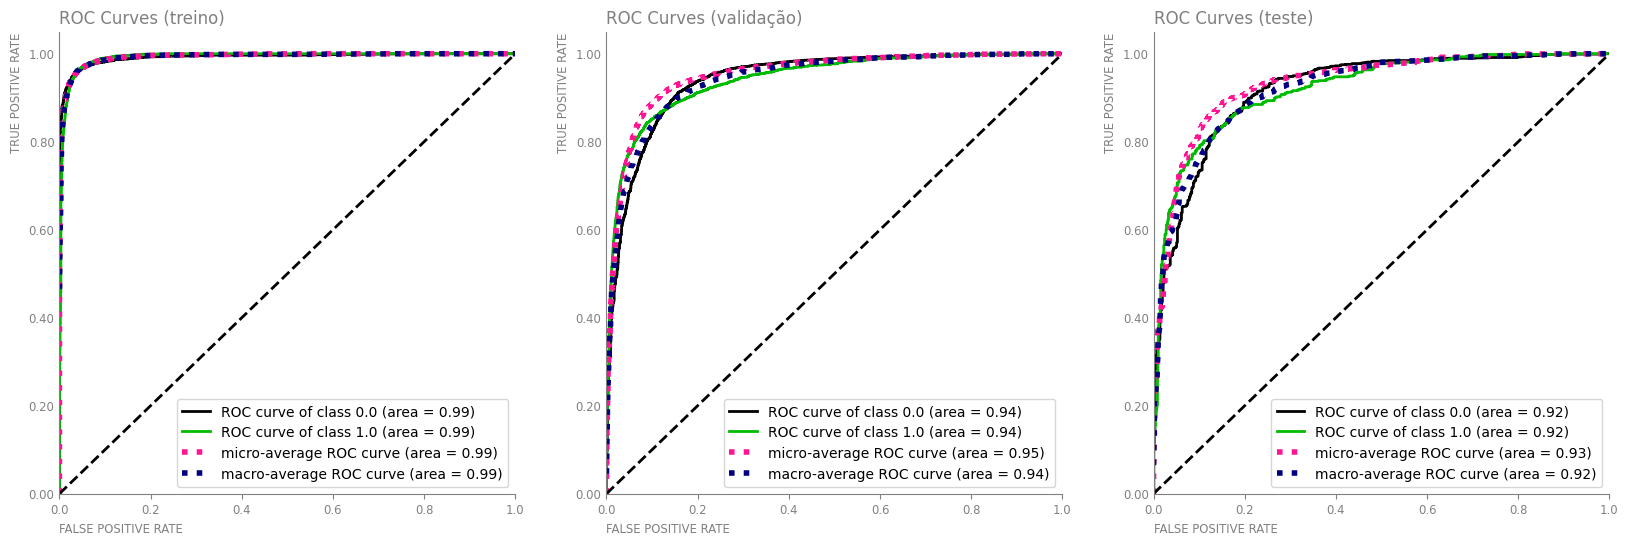

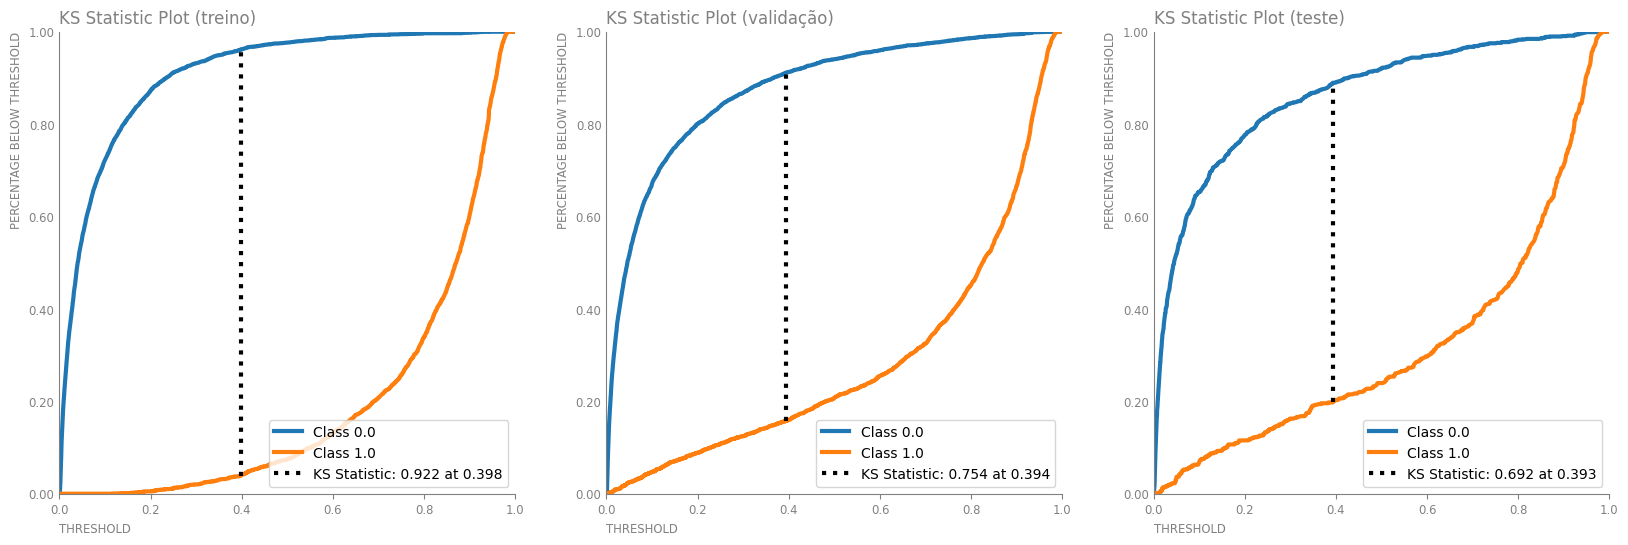

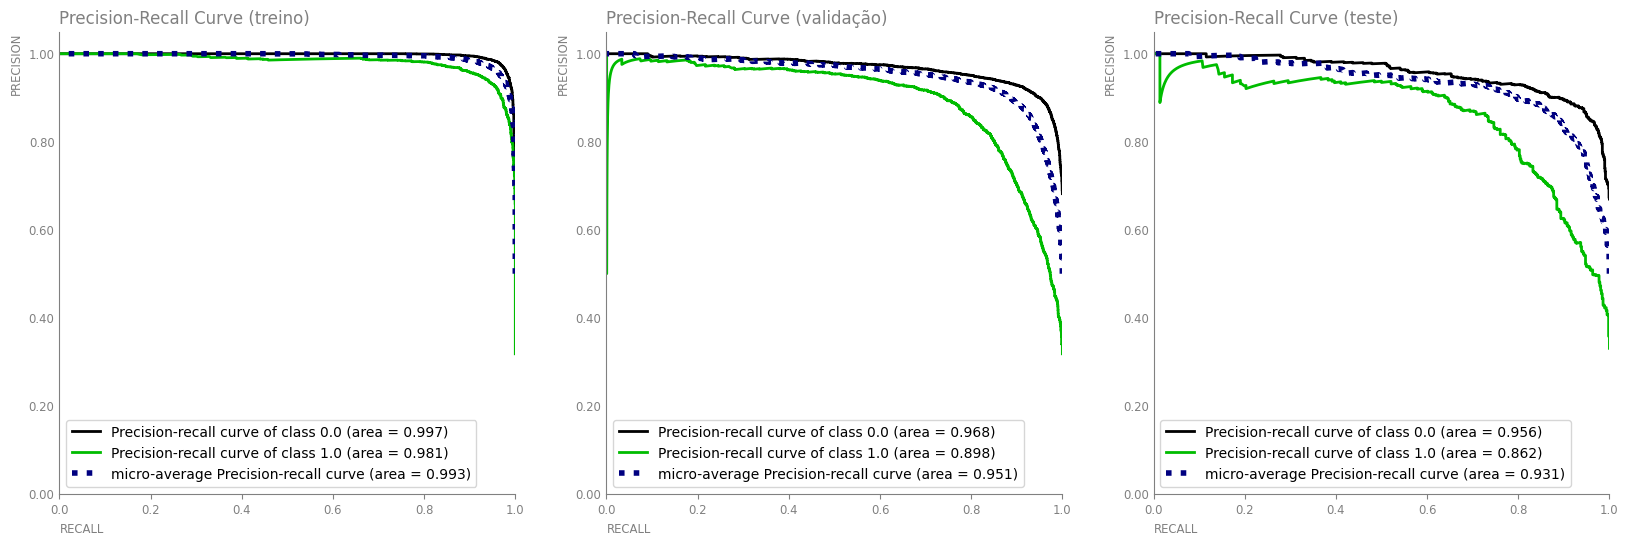

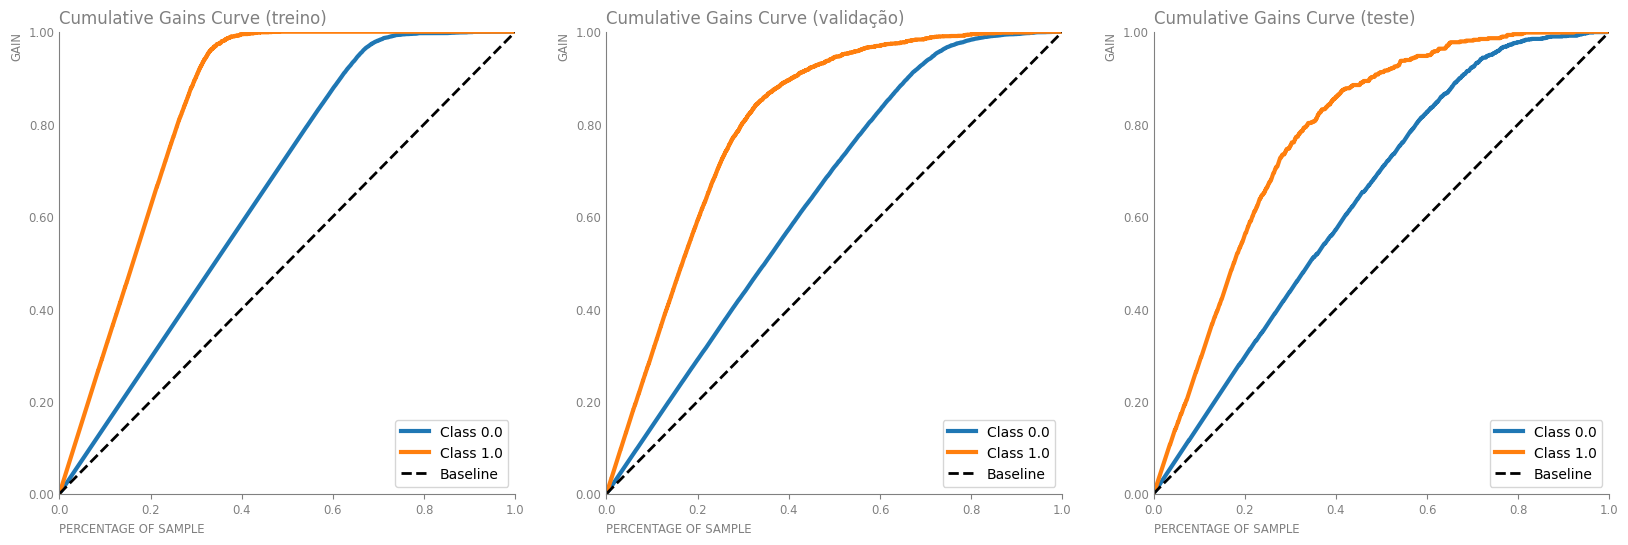

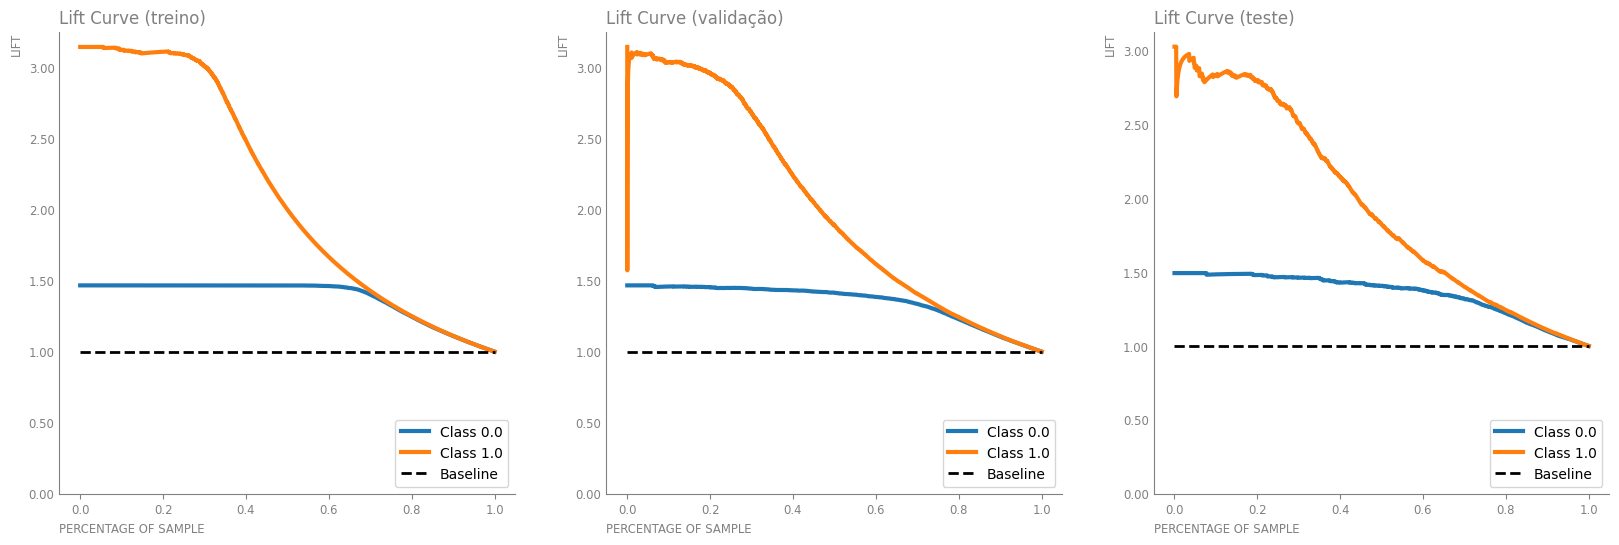

Generating shap plots...


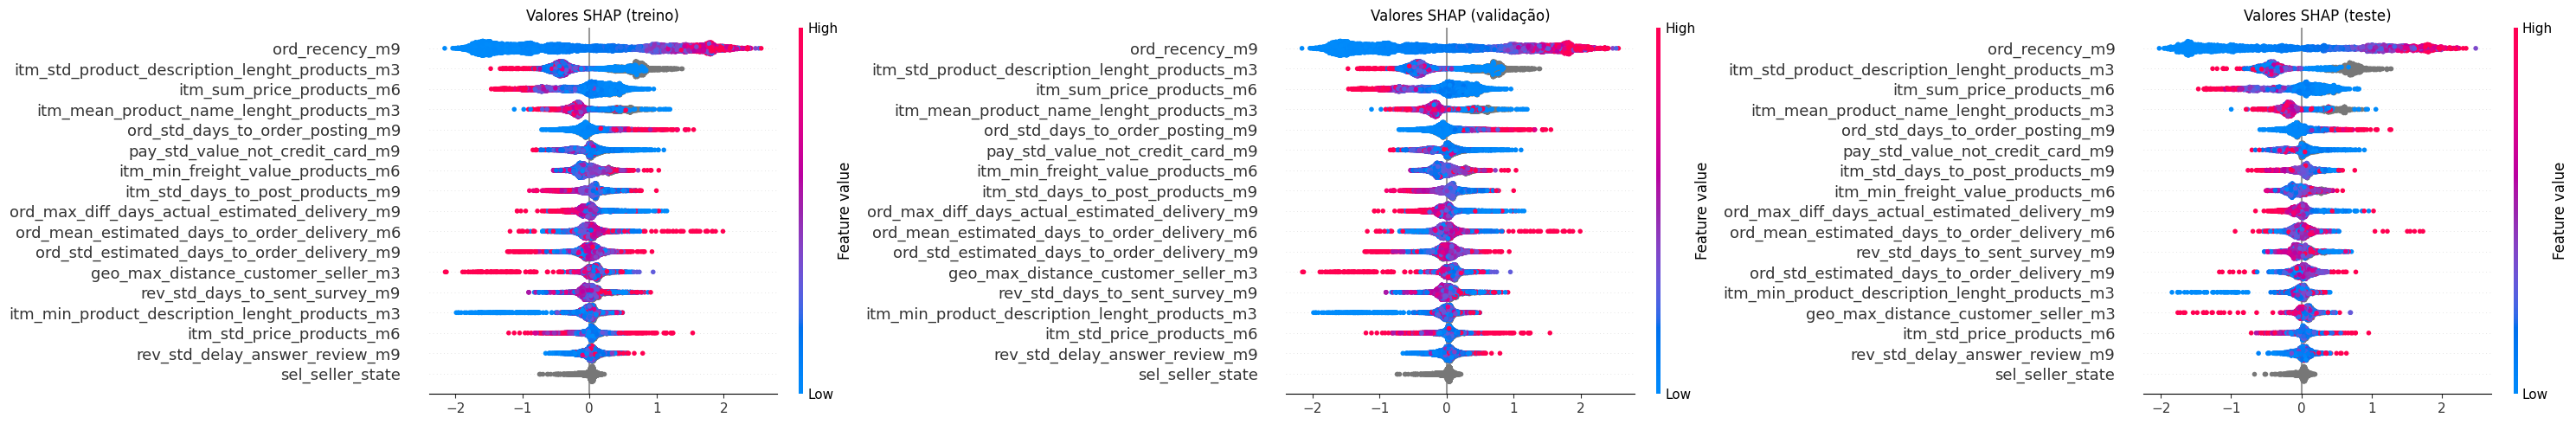

Generating learning curve...


13


[
    'ord_mean_estimated_days_to_order_delivery_m6',
    'ord_std_estimated_days_to_order_delivery_m9',
    'ord_std_days_to_order_posting_m9',
    'ord_max_diff_days_actual_estimated_delivery_m9',
    'ord_recency_m9',
    'itm_mean_product_name_lenght_products_m3',
    'itm_sum_price_products_m6',
    'itm_min_freight_value_products_m6',
    'itm_std_days_to_post_products_m9',
    'rev_std_delay_answer_review_m9',
    'rev_std_days_to_sent_survey_m9',
    'pay_std_value_not_credit_card_m9',
    'sel_seller_state'
]

Number of features: 13
Calculating cross validation metrics...
Calculating training metrics...
Calculating oot metrics...
AUC (dev): 0.9362057726290989
KS (dev): 0.7353160478262217
AUCPR (dev): 0.8913390049977093
BRIER LOSS (dev): 0.08605639326118104
LOG LOSS (dev): 0.2899547164545258
AUC (train): 0.989766015273802
KS (train): 0.9018767141690865
AUCPR (train): 0.9791474304776436
BRIER LOSS (train): 0.0435412064836672
LOG LOSS (train): 0.16971913389416274
AUC (oot): 0.9136048377851657
KS (oot): 0.6968450014179091
AUCPR (oot): 0.8558335017710651
BRIER LOSS (oot): 0.10248595367112254
LOG LOSS (oot): 0.33993915405139397
ACC (dev): 0.8201660417782539
Recall (dev): 0.4530526315789474
Precision (dev): 0.9607142857142857
F1 (dev): 0.6157367668097281
Recall-0 (dev): 0.9913606911447084
Precision-0 (dev): 0.7953686200378072
ACC (oot): 0.8006932409012132
Recall (oot): 0.42482517482517484
Precision (oot): 0.9382239382239382
F1 (oot): 0.5848375451263538
Recall-0 (oot): 0.9861949956859362
Precision-0

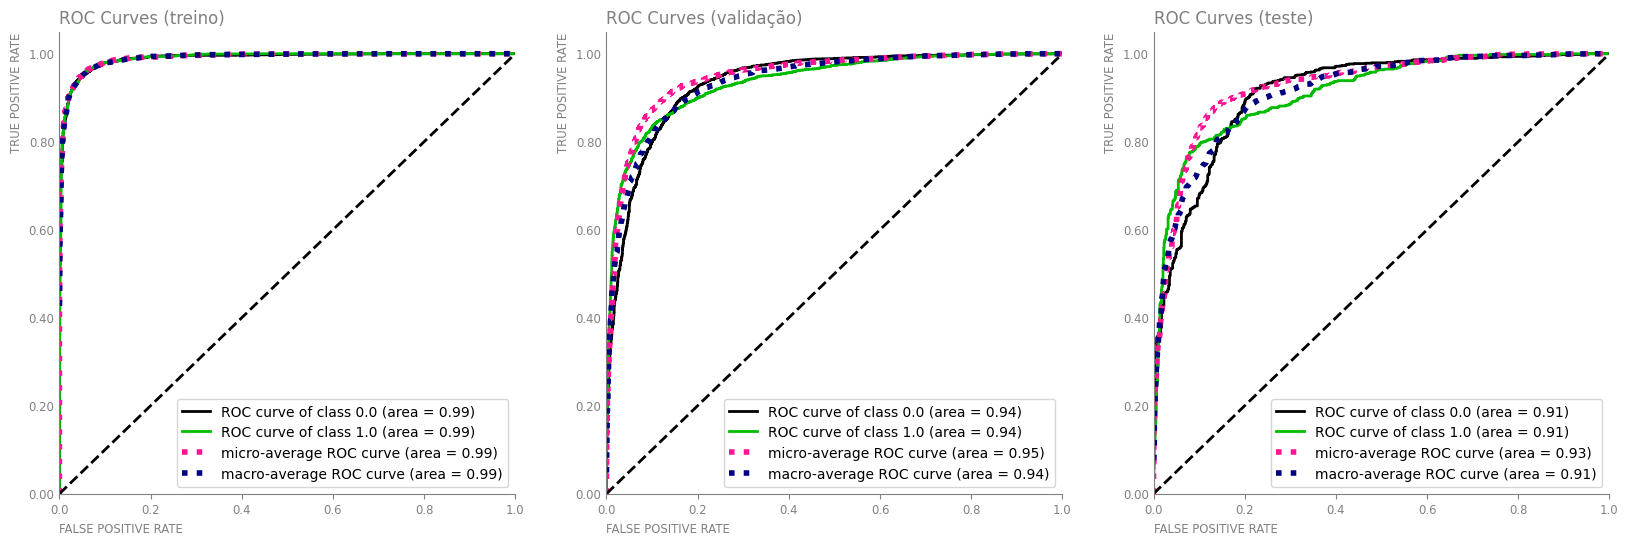

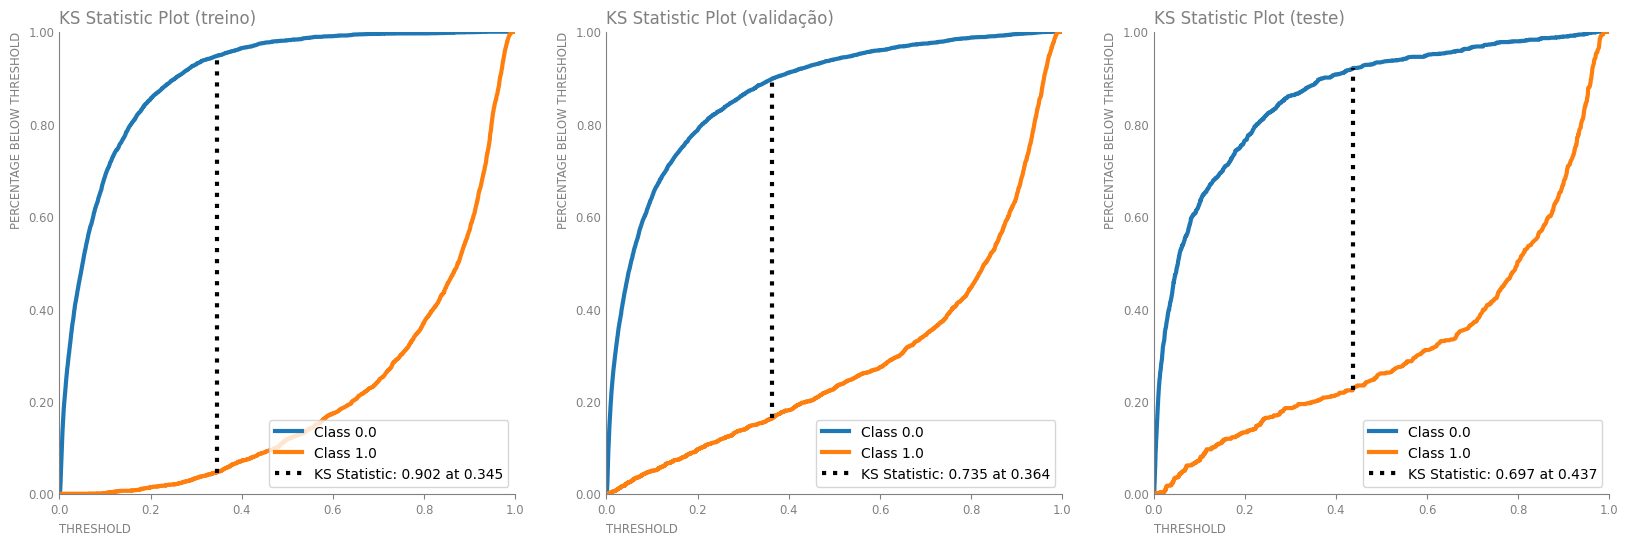

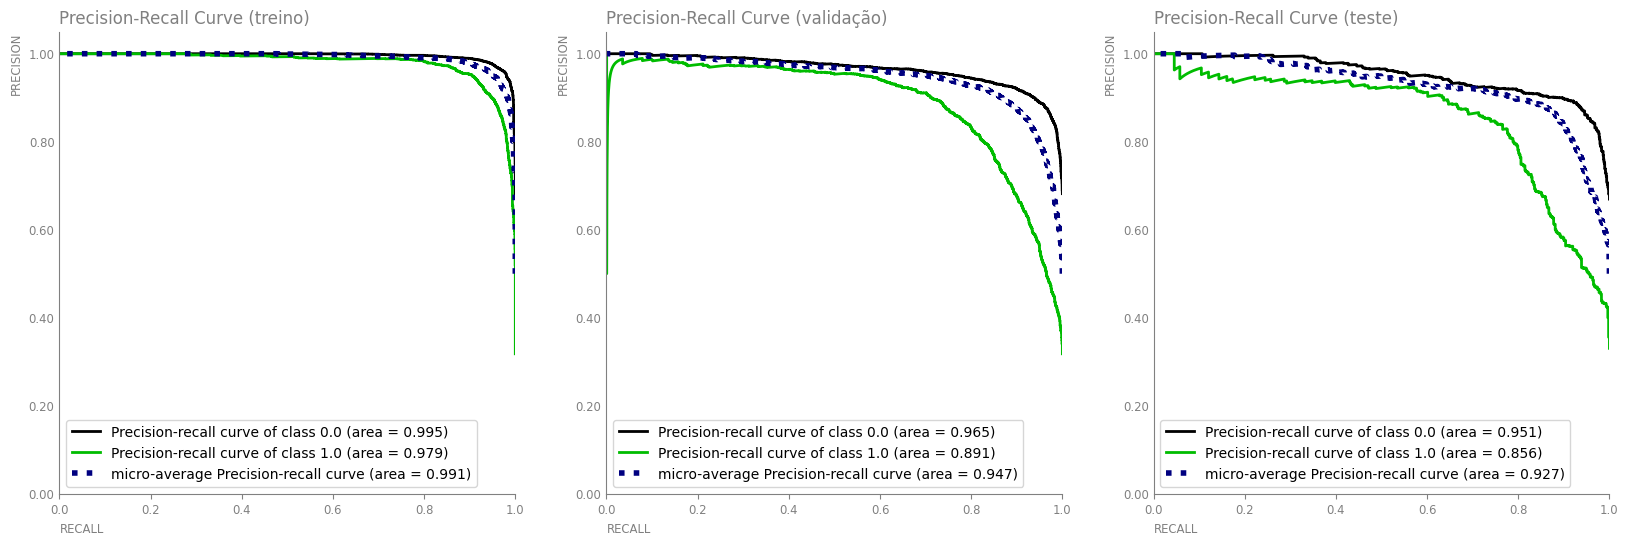

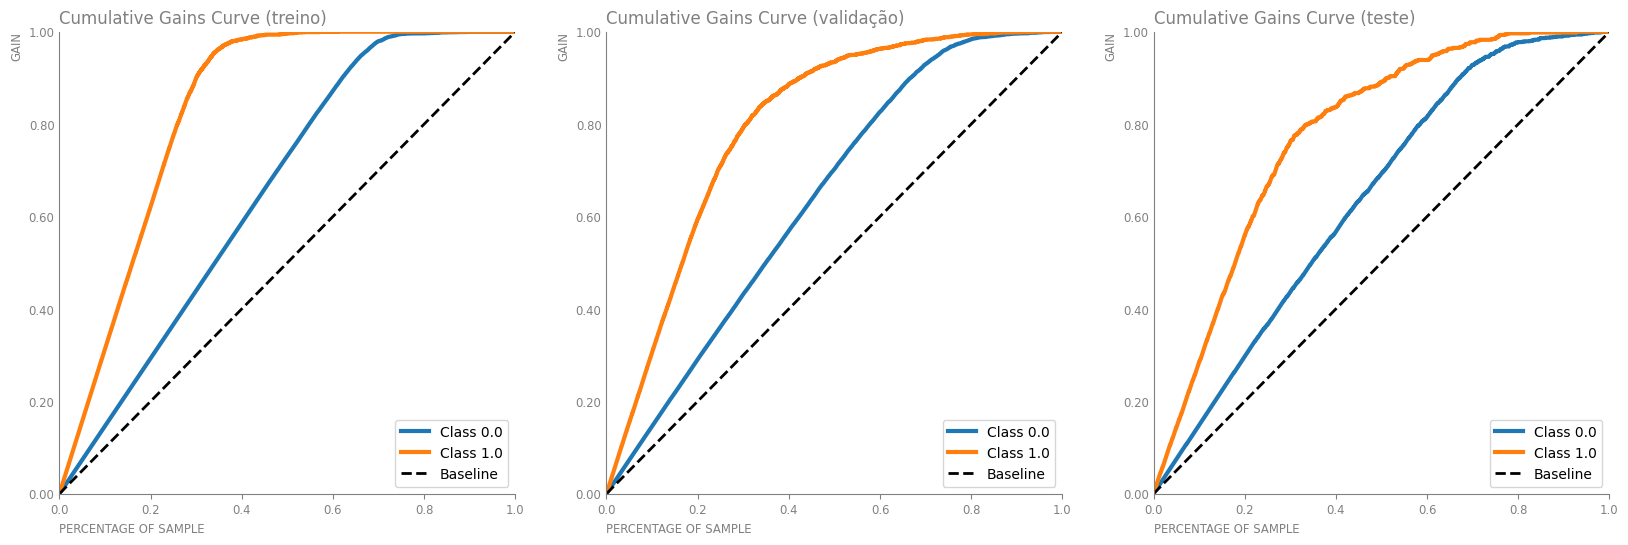

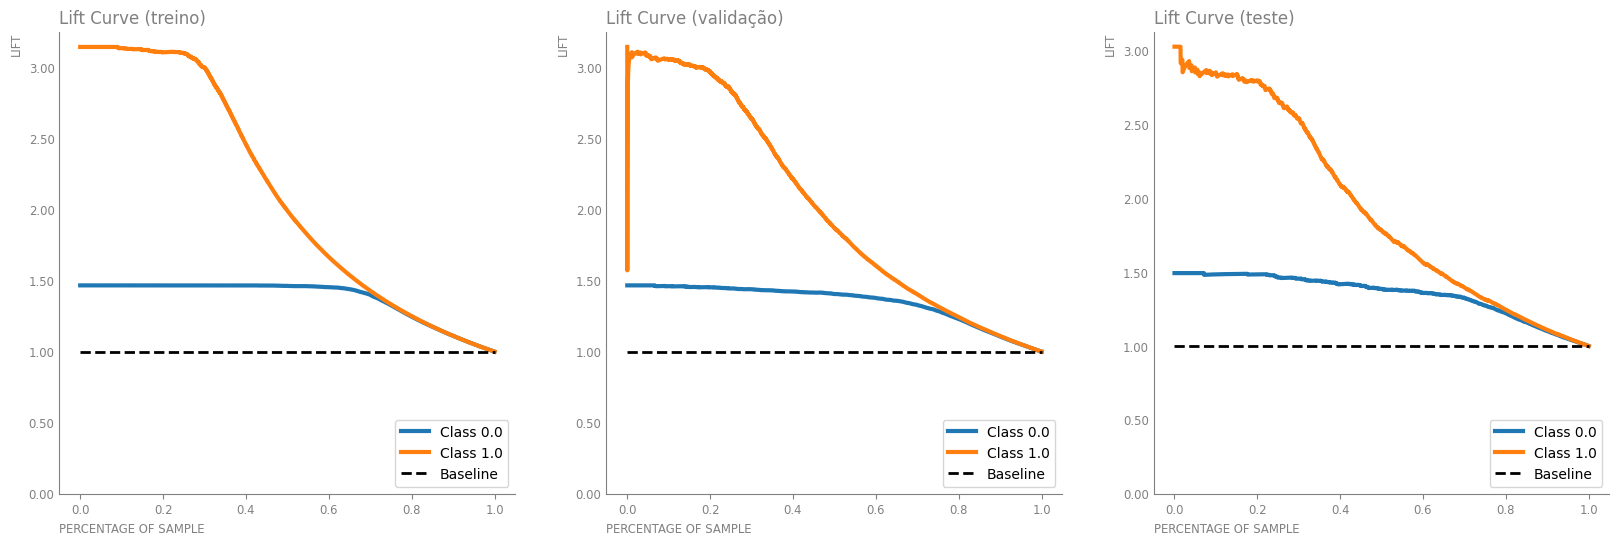

Generating shap plots...


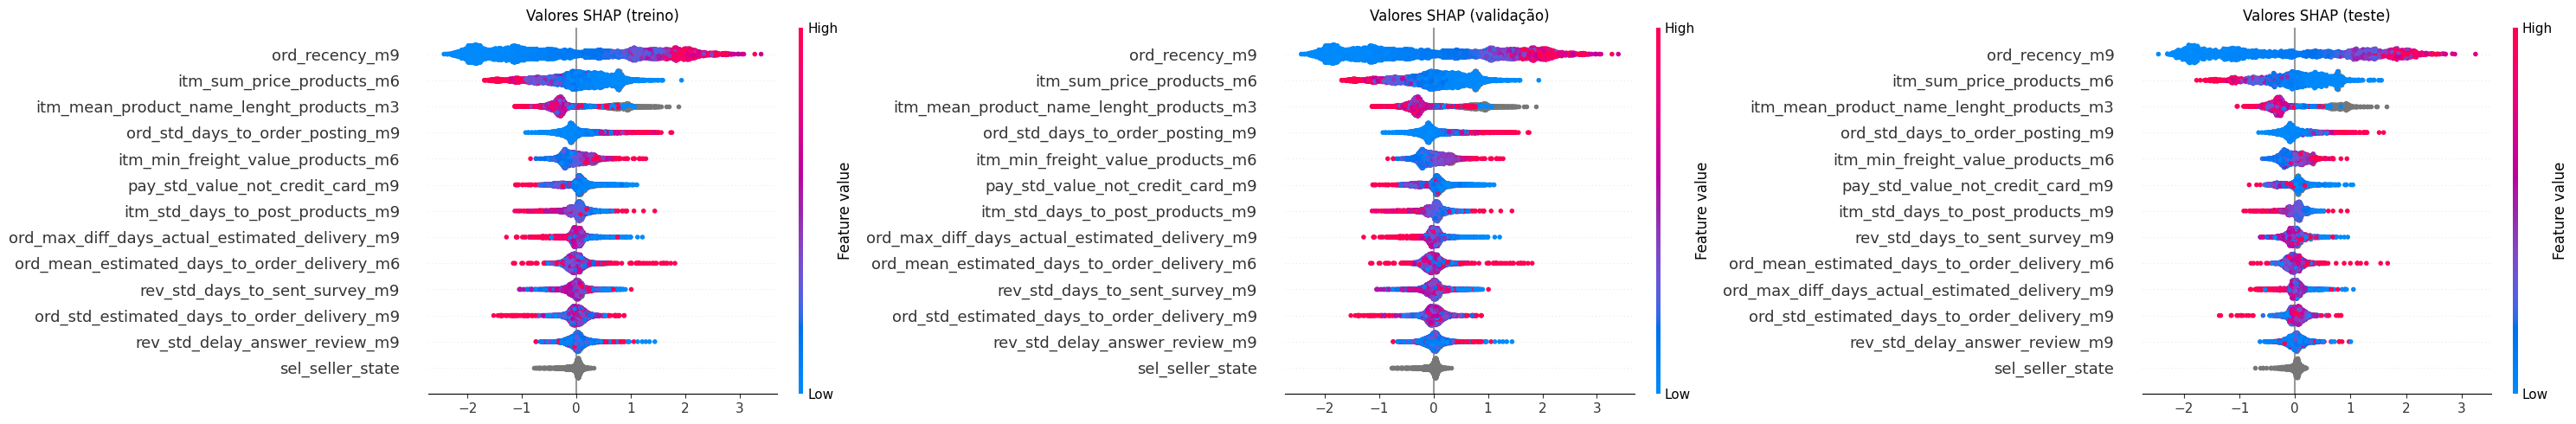

Generating learning curve...


12


[
    'ord_mean_estimated_days_to_order_delivery_m6',
    'ord_std_estimated_days_to_order_delivery_m9',
    'ord_std_days_to_order_posting_m9',
    'ord_recency_m9',
    'itm_mean_product_name_lenght_products_m3',
    'itm_sum_price_products_m6',
    'itm_min_freight_value_products_m6',
    'itm_std_days_to_post_products_m9',
    'rev_std_delay_answer_review_m9',
    'rev_std_days_to_sent_survey_m9',
    'pay_std_value_not_credit_card_m9',
    'sel_seller_state'
]

Number of features: 12
Calculating cross validation metrics...
Calculating training metrics...
Calculating oot metrics...
AUC (dev): 0.9352212221108436
KS (dev): 0.7263231473539533
AUCPR (dev): 0.8876412753003424
BRIER LOSS (dev): 0.08789660095198529
LOG LOSS (dev): 0.29338783894263
AUC (train): 0.9886946996393399
KS (train): 0.8985564086930462
AUCPR (train): 0.9759018445937816
BRIER LOSS (train): 0.0447193557631898
LOG LOSS (train): 0.1732731301010362
AUC (oot): 0.9118045457562283
KS (oot): 0.6985480007481734
AUCPR (oot): 0.853829225930268
BRIER LOSS (oot): 0.10270726928875462
LOG LOSS (oot): 0.3436255171900379
ACC (dev): 0.8201660417782539
Recall (dev): 0.4530526315789474
Precision (dev): 0.9607142857142857
F1 (dev): 0.6157367668097281
Recall-0 (dev): 0.9913606911447084
Precision-0 (dev): 0.7953686200378072
ACC (oot): 0.7983824378971692
Recall (oot): 0.42132867132867136
Precision (oot): 0.9305019305019305
F1 (oot): 0.5800240673886884
Recall-0 (oot): 0.9844693701466781
Precision-0 (oo

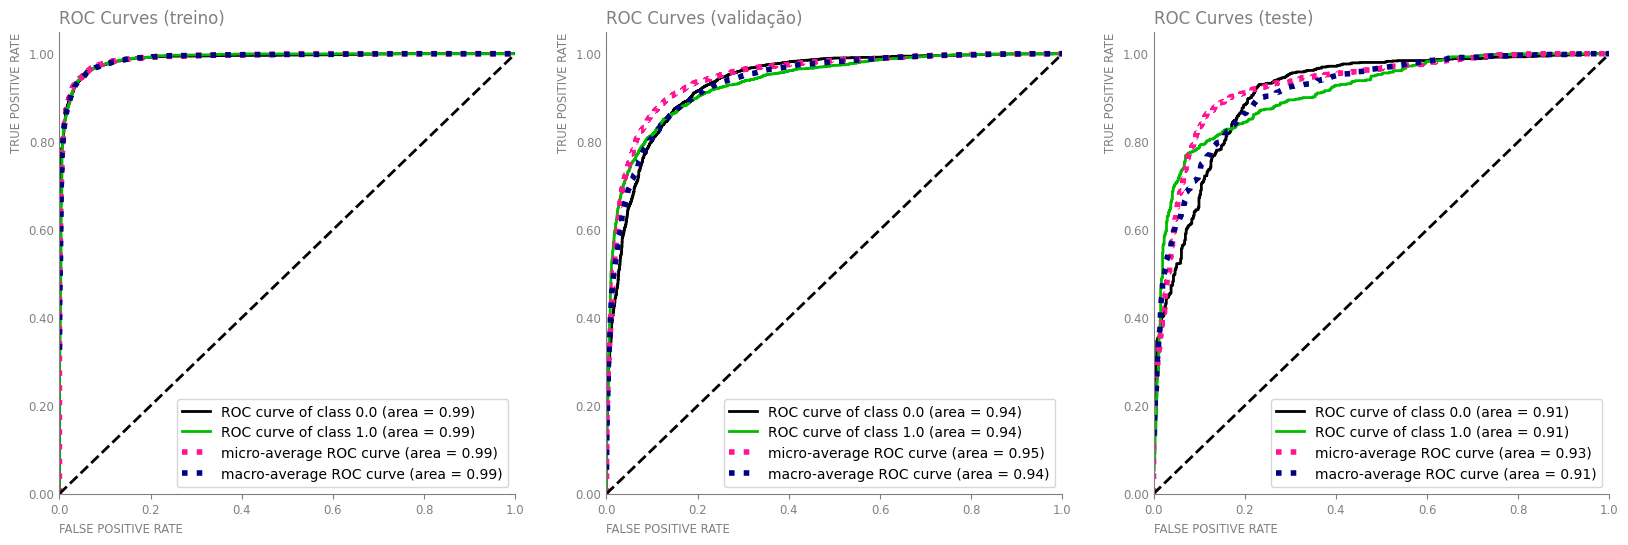

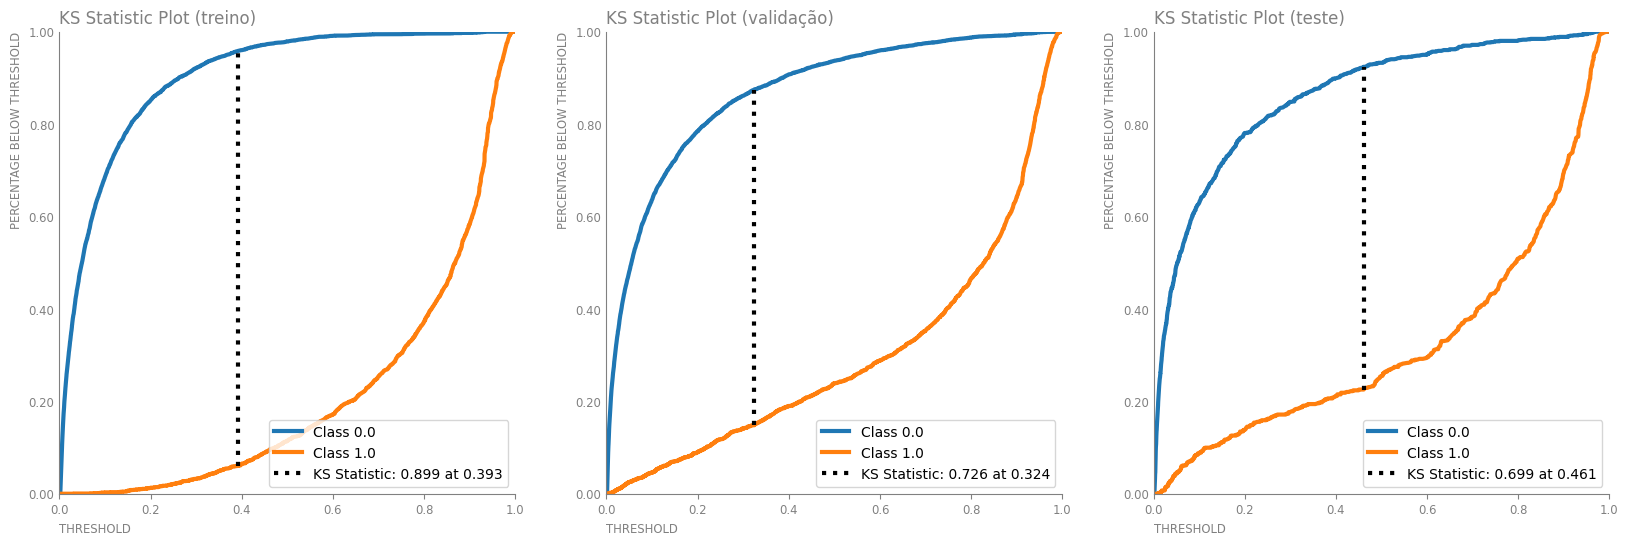

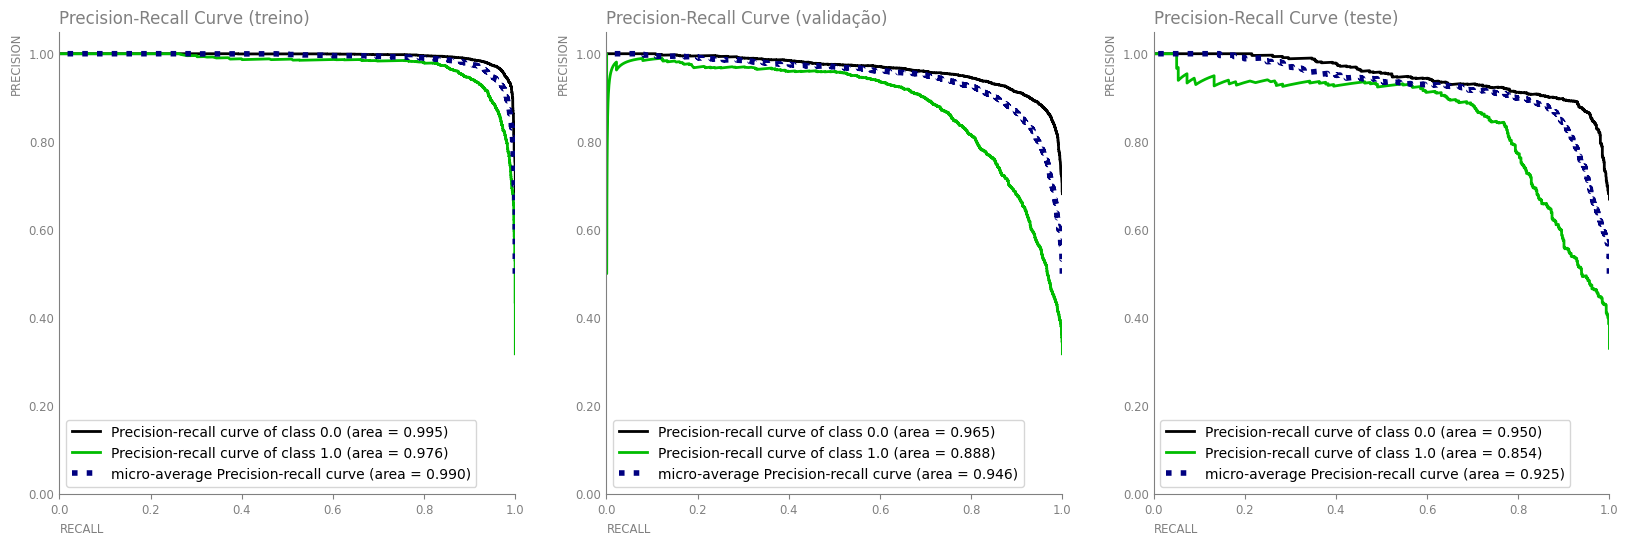

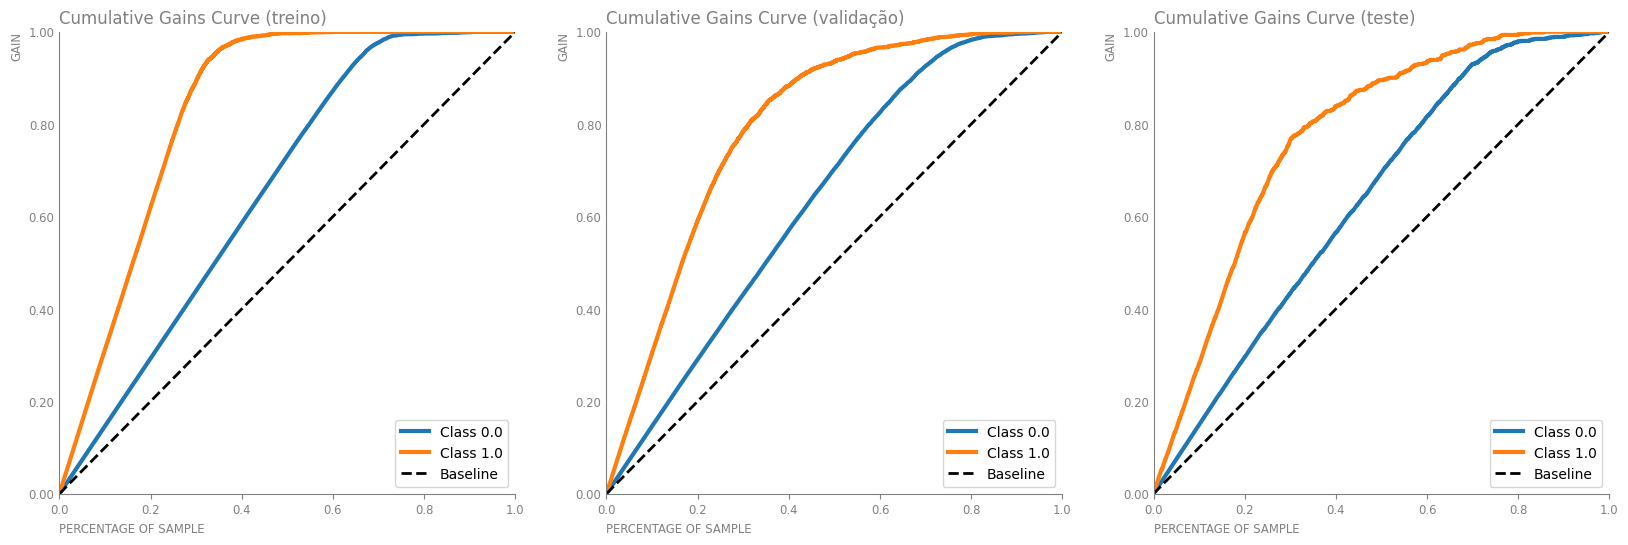

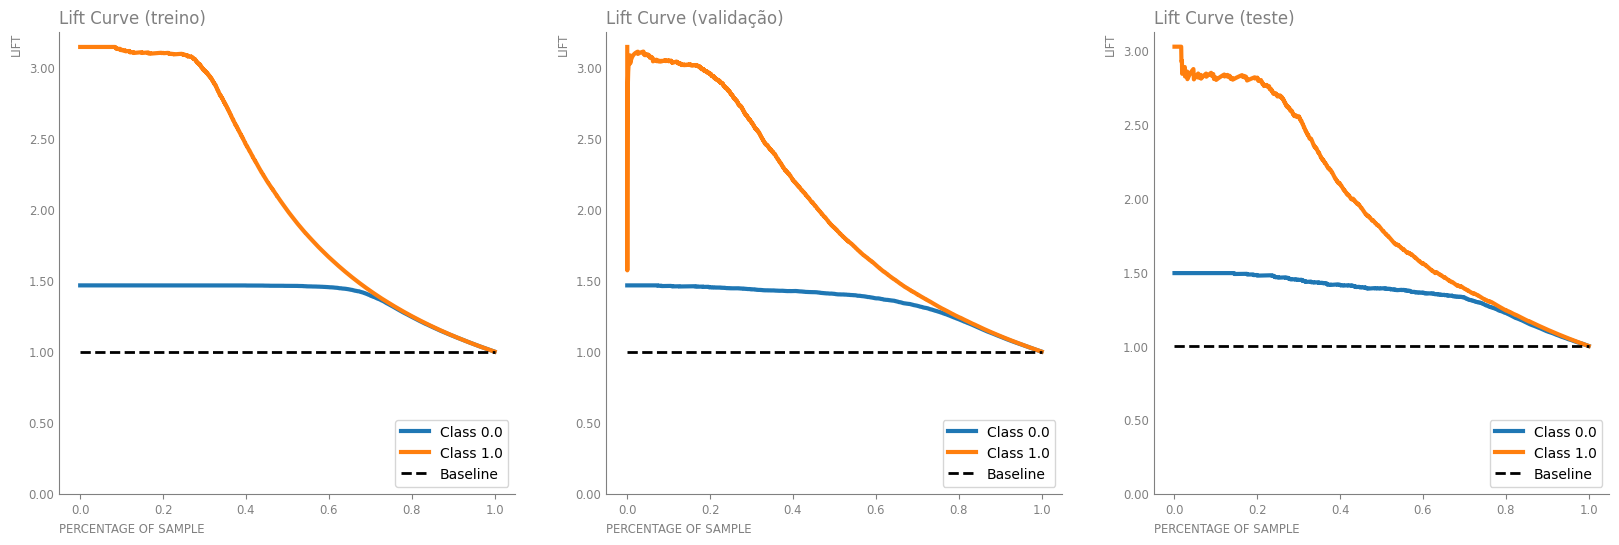

Generating shap plots...


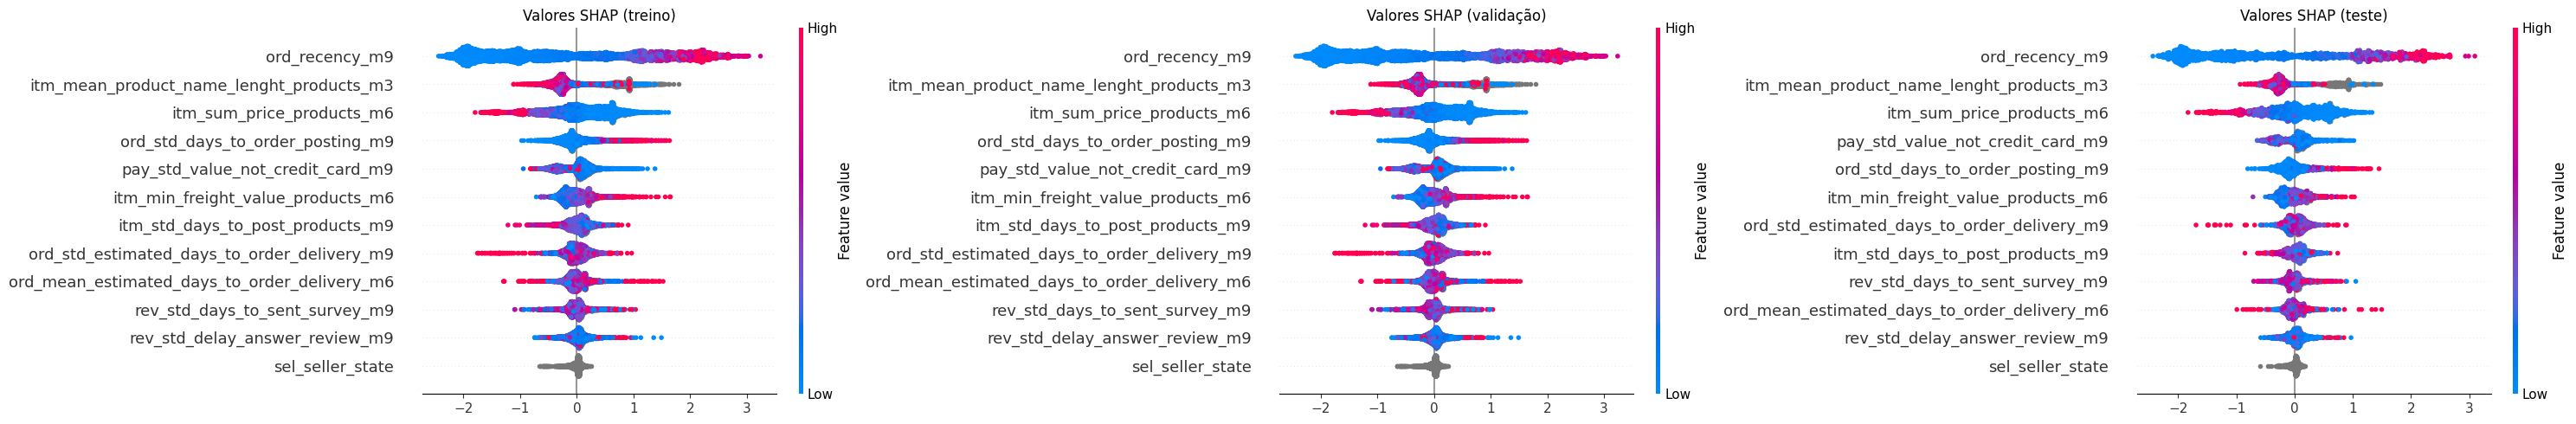

Generating learning curve...


In [ ]:
cat_vars = [col for col in X_dev[selected_features_corr].select_dtypes('category').columns]
num_vars = [col for col in X_dev[selected_features_corr].columns if col not in cat_vars]
model = get_model(X_dev[selected_features_corr],cat_vars,num_vars,
                    model_type=ModelType.LGBM)
for threshold in [0.001,.002,0.003]:
    pipe_steps = copy.deepcopy(model.steps)
    pipe_steps.insert(-1,('drop_rfa',
                          RecursiveFeatureAddition(estimator=model[-1],
                                                   cv=skf,
                                                   threshold=threshold)))
    feature_pipe = Pipeline(pipe_steps)
    feature_pipe[:-1].fit(X_dev[selected_features_corr],y_dev)
    selected_features_rfa = feature_pipe[-2].get_feature_names_out()
    display(len(selected_features_rfa),selected_features_rfa)

    X_dev_here = X_dev[selected_features_rfa]
    X_oot_here = X_oot[selected_features_rfa]
    cat_vars_here = [col for col in X_dev_here.select_dtypes('category').columns]
    num_vars_here = [col for col in X_dev_here.columns if col not in cat_vars]
    model_here = get_model(X_dev_here,cat_vars_here, num_vars_here,
                           model_type=ModelType.LGBM)
    mlflow_experiment_run_cv(model_here, X_dev_here, X_oot_here,
                                y_dev, y_oot,
                                cohort_dev, cohort_oot,
                                n_percentiles=5,
                                n_folds=5,
                                optuna_study=None,
                                metric_plots=True,
                                learning_curve_plot=True,
                                shap_plots=True,
                                mlflow_log=True,
                                run_name=f'corr80_rfa{int(threshold*1000)}(2)',
                                nested_run=False,
                                log_datasets=False,
                                log_model=False,
                                log_features=True,
                                features=selected_features_rfa)

## Boruta


# Check

In [17]:
expected = catalog.load('params:modeling.features')
actual = catalog.load('features_set')['final_feature_set']
if not all(feat in expected for feat in actual):
    print([feat for feat in actual if feat not in expected])

[01/07/25 10:12:48] INFO     Loading data from params:modeling.features (MemoryDataset)...      ]8;id=977251;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=182850;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#389\389]8;;\

                    INFO     Loading data from features_set (JSONDataset)...                    ]8;id=766707;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=515055;file:///home/bruno/Documents/Programming/Programming_projects/olist_project/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#389\389]8;;\